In [6]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)])/255.

Populating the interactive namespace from numpy and matplotlib


/home/chenxupeng/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
sns.set_context(contexts[1])
sns.set_style(styles[2])

In [8]:
cd /home/chenxupeng/projects/training/

/home/chenxupeng/projects/training


In [9]:
ls /BioII/lulab_b/wangsiqi/exRNA/published/exosome_exoRBase/

exosome_GSE100063_CRC/      exosome_GSE100232_PAAD/  snakemake/
exosome_GSE100206_Healthy/  exosome_GSE99985_CHD/
exosome_GSE100207_HCC/      foo/


In [10]:
rootpath_gse = '/BioII/lulab_b/wangsiqi/exRNA/published/exosome_SR2017_GSE71008/stat/'
rootpath_exo = '/Share/home/caojingyi/exRNA/process/14.exorbase/stat/hcc_lulab.readsN.stat.tsv.tmp.re'  #hcc paad normal

In [11]:
pd.read_table('/Share/home/caojingyi/exRNA/process/14.exorbase/stat/hcc_lulab.readsN.stat.tsv.tmp.re').shape

(45, 18)

In [517]:
rootpath_exo = '/BioII/lulab_b/shared/projects/exRNA/published_exRNA/exosome_exoRBase/'

In [12]:
ls /BioII/lulab_b/shared/projects/exRNA/published_exRNA/exosome_exoRBase

exosome_GSE100063_CRC/      exosome_GSE100207_HCC/   exosome_GSE99985_CHD/
exosome_GSE100206_Healthy/  exosome_GSE100232_PAAD/


In [532]:
rootpath_exo = '/BioII/lulab_b/shared/projects/exRNA/published_exRNA/exosome_exoRBase/'
exo_noraml = 'exosome_GSE100206_Healthy'
exo_paad = 'exosome_GSE100232_PAAD/'
exo_hcc = 'exosome_GSE100207_HCC/'
exo_crc = 'exosome_GSE100063_CRC/'
exo_chd = 'exosome_GSE99985_CHD/'
exo_category = [exo_noraml,exo_paad,exo_crc,exo_chd,exo_hcc]

In [13]:
table = pd.read_table('/BioII/lulab_b/wangsiqi/exRNA/published/exosome_SR2017_GSE71008/stat/Sample_N20.readsN.stat.tsv',
                     names=['sample','process','name','counts'])
table.head(1)

,sample,process,name,counts
0,Sample_N20,preprocess,libSizeN,12382962


In [14]:
table = pd.read_table(rootpath_exo ,)
                     #names=['sample','process','name','counts'])
table.head(1)

,libSizeN,cleanN,rRNA_N,keptN,hg38,miRNA,piRNA,Y_RNA,srpRNA,tRNA,snoRNA,snRNA,vaultRNA,lncRNA,mRNA,tucpRNA,hg38other,nonHuman_N
SRR5712486,25872692,25872520,41318,25833916,24563028,89716,3875274,1556,170486,5794,1450,16444,0,2096844,14752722,612458,3137356,1583362


In [15]:
table = pd.read_table('/Share/home/caojingyi/exRNA/process/18.new_hcc_lulab/stat/Normal-8.readsN.stat.tsv',
                     names=['sample','process','name','counts'])
table.head(1)

,sample,process,name,counts
0,Normal-8,preprocess,libSizeN,67754658


In [16]:
table[table['name'] =='lncRNA']['counts']

13    372439
Name: counts, dtype: int64

In [17]:
np.unique(table['name'])

array(['Y_RNA', 'cleanN', 'hg38', 'hg38other', 'keptN', 'libSizeN',
       'lncRNA', 'mRNA', 'miRNA', 'nonHuman_N', 'piRNA', 'rRNA_N',
       'snRNA', 'snoRNA', 'srpRNA', 'tRNA', 'tucpRNA', 'vaultRNA'],
      dtype=object)

In [ ]:
lnccounts = {}
wholecounts = {}
for i in os.listdir(rootpath_publish):
    print (i)
    if i.split('.')[1] =='readsN':
        table = pd.read_table(rootpath_publish+i,names=['sample','process','name','counts'])
        lnccounts[i] =int(table[table['name'] =='lncRNA']['counts'])
        wholecounts[i] =int(table[table['name'] =='cleanN']['counts'])

In [18]:
def count_stats(rnaname,rootpath,typepath=None):
    '''
    rnaname: lncRNA/   cleanN
    rootpath: rootpath_gse/rootpath_hcc/rootpath_exo
    typepath: exo_noraml/exo_paad/exo_hcc
    '''
    counts = {}
    if typepath is not None:
        rootpath = rootpath + typepath+'stat/'
        print (rootpath)
    samplename = []
    for i in os.listdir(rootpath):
        #print (i)
        if len(i.split('.'))>1:
            if i.split('.')[1] =='readsN':
                table = pd.read_table(rootpath+i,names=['sample','process','name','counts'])
                counts[i.split('.')[0]] =int(table[table['name'] ==rnaname]['counts'])
                samplename.append(i.split('.')[0])
    table = pd.DataFrame(np.array([counts[i] for i in samplename]).reshape(1,-1),columns = samplename)
    table.index = [rnaname]
    return table

In [19]:
rnanames = np.array(['Y_RNA', 'cleanN', 'hg38other','libSizeN',
       'lncRNA', 'mRNA', 'miRNA', 'nonHuman_N', 'piRNA', 'rRNA_N',
       'snRNA', 'snoRNA', 'srpRNA', 'tRNA', 'tucp'])

In [ ]:
newtable_exo = count_stats(rnanames[0],rootpath_exo,typepath=None)
count = 0
for i in rnanames[1:]:
    #print (i)
    newtable_exo = pd.concat((newtable_exo,count_stats(i,rootpath_exo,typepath=None)))

In [20]:
newtable_exo = pd.read_table(rootpath_exo).T
newtable_exo.shape

(18, 45)

In [21]:
exosamplenames = pd.read_table('/Share/home/shibinbin/projects/exRNA/metadata/sample_classes.exoRBase.txt', header=None)

In [22]:
exosamplenames.index = exosamplenames[0]

In [23]:
exosamplenames.loc[newtable_exo.columns].head()

,0,1
SRR5712486,SRR5712486,Healthy
SRR5712487,SRR5712487,Healthy
SRR5712488,SRR5712488,Healthy
SRR5712489,SRR5712489,Healthy
SRR5712490,SRR5712490,Healthy


In [24]:
newtable_gse = count_stats(rnanames[0],rootpath_gse,typepath=None)
count = 0
for i in rnanames[1:]:
    #print (i)
    newtable_gse = pd.concat((newtable_gse,count_stats(i,rootpath_gse,typepath=None)))
newtable_gse

,Sample_1S10,Sample_1S11,Sample_1S12,Sample_1S13,Sample_1S14,Sample_1S15,Sample_1S16,Sample_1S17,Sample_1S18,Sample_1S19,...,Sample_PC34,Sample_PC35,Sample_PC36,Sample_PC3,Sample_PC4,Sample_PC5,Sample_PC6,Sample_PC7,Sample_PC8,Sample_PC9
Y_RNA,88835,127497,145142,90106,105377,87513,121418,144229,99332,107790,...,109816,101729,84469,156049,59227,115908,130839,110328,100963,125241
cleanN,9034303,10963430,11077344,10262615,11065325,8790822,9961766,12369862,8815019,9889997,...,11109388,10409301,8795614,8975816,8323012,11673825,11660441,8035319,10378005,9378657
hg38other,1462269,2044478,2624270,1476586,1806268,1276577,1636113,2604999,1687056,1576260,...,1454798,1480727,1411611,1739944,2426760,3211371,2636486,1710433,1872152,1630175
libSizeN,11362190,13437632,13905951,12271219,13619701,10513567,12163369,14295035,11950533,12031059,...,14582309,12192997,11384819,12035279,14103551,14862265,14890561,10944417,11906498,11701463
lncRNA,26733,38346,35639,25523,31489,21601,26915,37259,28952,26509,...,24776,23493,25332,37166,44244,49285,44738,36209,37819,33028
mRNA,51080,75211,90614,40932,47424,34856,46901,71520,55873,46549,...,44260,39668,43978,69939,112072,113917,90941,71234,58408,58025
miRNA,2344713,2703185,2845495,2403853,1867128,1441732,2375036,2428861,1609241,2451537,...,2718423,1805776,2380238,3050008,2713810,2703903,2997784,1757344,2380145,2755247
nonHuman_N,1538546,1940420,1071936,1049315,1294511,1193870,1038059,1338284,1641399,892580,...,1122041,762000,1052671,1316796,1667290,1593136,1571943,2305630,2378221,1678617
piRNA,2816805,3302901,3218331,4268506,4871759,3989122,3917185,4638096,3041241,4066612,...,4787800,5307212,3074789,2005518,818385,2894462,3205091,1546672,2750730,2476995
rRNA_N,252667,180471,364641,296549,287755,184669,218814,350153,161304,176541,...,169822,201244,206679,138983,128272,376115,378867,148692,269216,176715


In [25]:
newtable_gse

,Sample_1S10,Sample_1S11,Sample_1S12,Sample_1S13,Sample_1S14,Sample_1S15,Sample_1S16,Sample_1S17,Sample_1S18,Sample_1S19,...,Sample_PC34,Sample_PC35,Sample_PC36,Sample_PC3,Sample_PC4,Sample_PC5,Sample_PC6,Sample_PC7,Sample_PC8,Sample_PC9
Y_RNA,88835,127497,145142,90106,105377,87513,121418,144229,99332,107790,...,109816,101729,84469,156049,59227,115908,130839,110328,100963,125241
cleanN,9034303,10963430,11077344,10262615,11065325,8790822,9961766,12369862,8815019,9889997,...,11109388,10409301,8795614,8975816,8323012,11673825,11660441,8035319,10378005,9378657
hg38other,1462269,2044478,2624270,1476586,1806268,1276577,1636113,2604999,1687056,1576260,...,1454798,1480727,1411611,1739944,2426760,3211371,2636486,1710433,1872152,1630175
libSizeN,11362190,13437632,13905951,12271219,13619701,10513567,12163369,14295035,11950533,12031059,...,14582309,12192997,11384819,12035279,14103551,14862265,14890561,10944417,11906498,11701463
lncRNA,26733,38346,35639,25523,31489,21601,26915,37259,28952,26509,...,24776,23493,25332,37166,44244,49285,44738,36209,37819,33028
mRNA,51080,75211,90614,40932,47424,34856,46901,71520,55873,46549,...,44260,39668,43978,69939,112072,113917,90941,71234,58408,58025
miRNA,2344713,2703185,2845495,2403853,1867128,1441732,2375036,2428861,1609241,2451537,...,2718423,1805776,2380238,3050008,2713810,2703903,2997784,1757344,2380145,2755247
nonHuman_N,1538546,1940420,1071936,1049315,1294511,1193870,1038059,1338284,1641399,892580,...,1122041,762000,1052671,1316796,1667290,1593136,1571943,2305630,2378221,1678617
piRNA,2816805,3302901,3218331,4268506,4871759,3989122,3917185,4638096,3041241,4066612,...,4787800,5307212,3074789,2005518,818385,2894462,3205091,1546672,2750730,2476995
rRNA_N,252667,180471,364641,296549,287755,184669,218814,350153,161304,176541,...,169822,201244,206679,138983,128272,376115,378867,148692,269216,176715


In [26]:
hccanno = pd.read_csv('data/wholeannotation.csv')
usesampleid_hcc = np.array([np.array(hccanno[hccanno['use'] ==1]['Sample_ID'])[i][6:] for i in range(43)])

In [27]:
usesampleid_hcc

array(['249136_B', '385247_B', '423976_B', '497411_B', '497497_B',
       '498127_B', '498187_B', '498221_B', '507450_B', '507468_B',
       '507511_B', '507599_B', '507867_B', '507887_B', '507909_B',
       '508877_B', '508897_B', '511030_B', '511485_B', '515058_B',
       '515292_B', 'SH325716_B', 'SH327409_B', 'SH327412_B', 'SH327428_B',
       '17402567_B', '3497470_B', '5474594_B', '6474170_B', '8397116_B',
       'LY', 'CXD', 'Normal_1', 'Normal_2', 'Normal_3', 'Normal_4',
       'Normal_5', 'Normal_6', 'Normal_7', 'Normal_8', 'HBV_1', 'HBV_2',
       'HBV_3'], dtype='<U10')

In [28]:
usesampleid_hcc = np.array(['249136-B', '385247-B', '423976-B', '497411-B', '497497-B',
       '498127-B', '498187-B', '498221-B', '507450-B', '507468-B',
       '507511-B', '507599-B', '507867-B', '507887-B', '507909-B',
       '508877-B', '508897-B', '511030-B', '511485-B', '515058-B',
       '515292-B', 'SH325716-B', 'SH327409-B', 'SH327412-B', 'SH327428-B',
       '17402567-B', '3497470-B', '5474594-B', '6474170-B', '8397116-B',
       'LY', 'CXD', 'Normal-1', 'Normal-2', 'Normal-3', 'Normal-4',
       'Normal-5', 'Normal-6', 'Normal-7', 'Normal-8', 'mix1_combined_R1', 'mix2_combined_R1',
       'mix3_combined_R1'])

In [29]:
newtable_hcc = pd.read_table('/home/chenxupeng/projects/training/data/18.new_hcc_lulab_stat/hcc_lulab.readsN.stat.tsv',
                     )
newtable_hcc.index = newtable_hcc['sample']
newtable_hcc = newtable_hcc.iloc[:,1:]
newtable_hcc = newtable_hcc.loc[:,usesampleid_hcc]
newtable_hcc.shape

(18, 43)

In [31]:
newtable_hcc.shape,newtable_gse.shape,newtable_exo.shape

((18, 43), (15, 192), (18, 45))

In [32]:
newtable_exo.to_csv('/home/chenxupeng/projects/TA/bioinfo_quiz/exrna/data/other_annotations/exorbase_rna_stats.csv')

In [33]:
newtable_gse.to_csv('/home/chenxupeng/projects/TA/bioinfo_quiz/exrna/data/other_annotations/scirep_rna_stats.csv')

In [34]:
newtable_hcc.to_csv('/home/chenxupeng/projects/TA/bioinfo_quiz/exrna/data/other_annotations/hcc_rna_stats.csv')

# barplot boxplot PCA of rna types

In [312]:
def plot_bar(rnaname,dataname ='hcc'):
    if dataname =='hcc':
        table = newtable_hcc
        ranges = np.arange(0,45,5)
        title = 'HCClulab'
    elif dataname =='gse':
        table = newtable_gse
        ranges = np.arange(0,210,10)
        title = 'SciReport'
    if dataname =='exo':
        table = newtable_exo
        ranges = np.arange(0,50,10)
        title = 'ExoRBase'
    count = np.array(table[table.index ==rnaname])
    fig,ax=plt.subplots(1,figsize=(20,6))
    counttable =  pd.DataFrame(np.concatenate((np.arange(1,table.shape[1]+1).reshape(-1,1),
                ~np.sort(~count).reshape(-1,1)),axis=1),columns=['sample','counts'])
    sns.barplot(x='sample',y='counts',data = counttable,color='b',alpha=0.5)

    ax.set_xticks(ranges)
    ax.set_xticklabels(ranges)
    ax.set_title('Counts of '+title+' '+rnaname,fontsize=30)

In [313]:
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
sns.set_context(contexts[2])
sns.set_style(styles[2])

### barplot

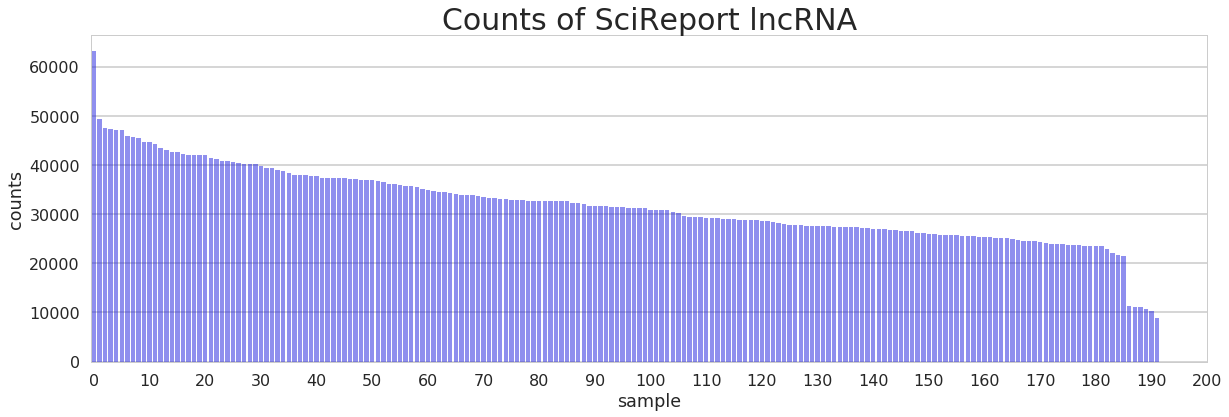

In [314]:
plot_bar('lncRNA',dataname ='gse')

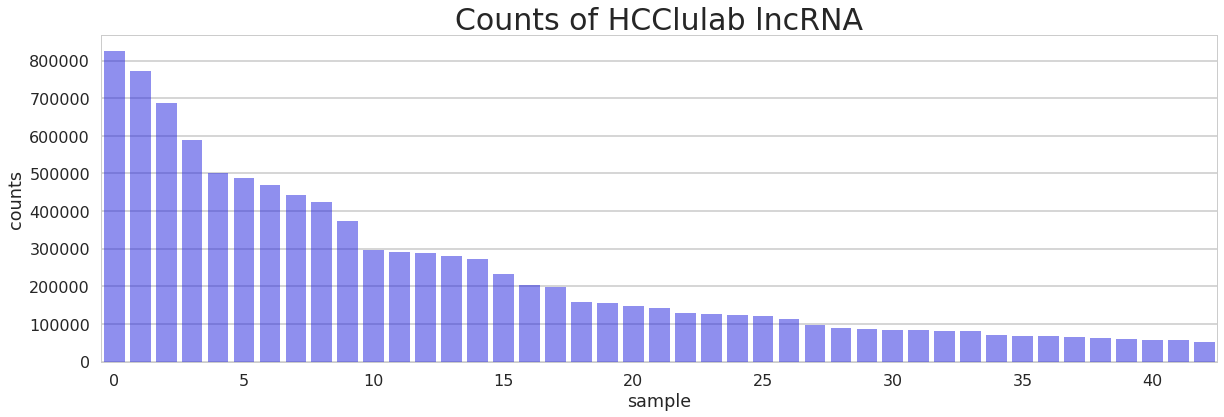

In [315]:
plot_bar('lncRNA',dataname ='hcc')

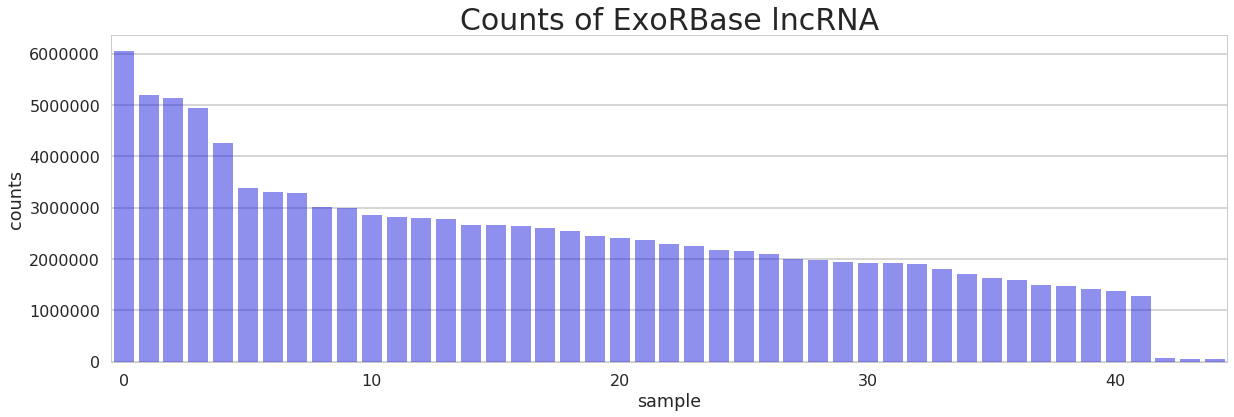

In [323]:
plot_bar('lncRNA',dataname ='exo')

In [501]:
interestedrna = np.array(['Y_RNA', 'lncRNA', 'miRNA', 'piRNA',
       'snRNA', 'snoRNA', 'srpRNA', 'tRNA', 'tucp','mRNA','vaultRNA'])

# SciRep2016这套数据
统计所有长RNA（lnc mrna）的reads数, barplot，看看能否找出一些domain作为feature来预测

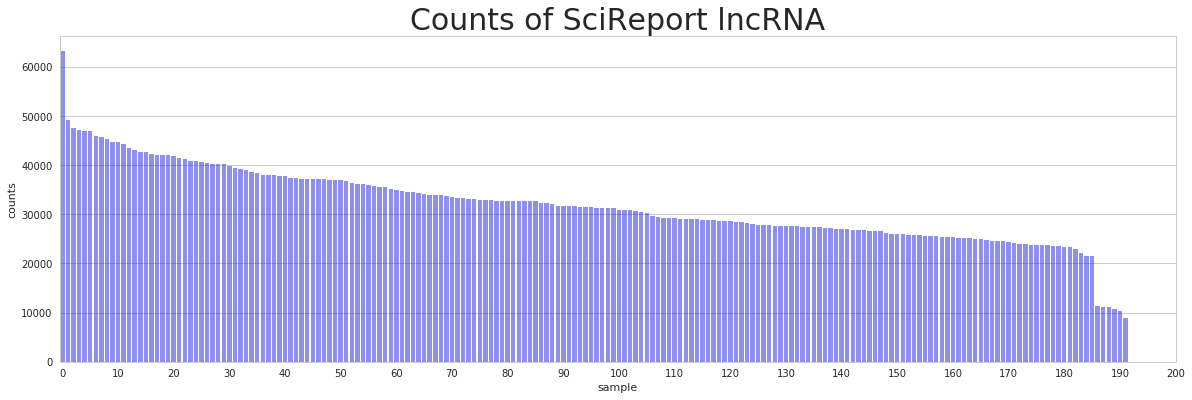

In [499]:
plot_bar('lncRNA',dataname ='gse')

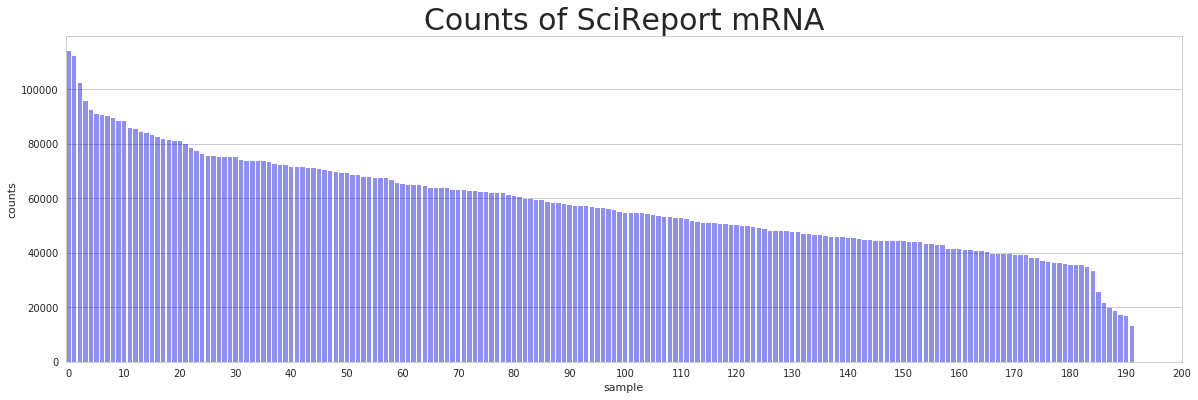

In [500]:
plot_bar('mRNA',dataname ='gse')

画所有样本累积为一的barplot
三套数据，画cumulate_bar

In [505]:
newtable_hcc.loc[interestedrna]

,249136-B,385247-B,423976-B,497411-B,497497-B,498127-B,498187-B,498221-B,507450-B,507468-B,...,Normal-2,Normal-3,Normal-4,Normal-5,Normal-6,Normal-7,Normal-8,mix1_combined_R1,mix2_combined_R1,mix3_combined_R1
sample,,,,,,,,,,,,,,,,,,,,,
Y_RNA,7210562.0,13571039.0,12923921.0,9816238.0,7340708.0,20736391.0,10728719.0,3647568.0,14878409.0,14590121.0,...,27639216.0,23817459.0,26033663.0,23777126.0,31999382.0,26255544.0,8348007.0,38032375.0,37892890.0,28841083.0
lncRNA,771916.0,441468.0,89119.0,204292.0,57538.0,499799.0,588631.0,125997.0,86685.0,292159.0,...,63361.0,84030.0,154699.0,80249.0,81256.0,113996.0,372439.0,58588.0,69085.0,68698.0
miRNA,18287392.0,20664655.0,7838132.0,39928790.0,15827656.0,32080121.0,28786106.0,7707059.0,18253406.0,19770012.0,...,12758552.0,15708346.0,18323768.0,13529907.0,18180408.0,17768598.0,36460575.0,19930498.0,26203229.0,17246308.0
piRNA,2602314.0,1473948.0,700810.0,609362.0,131343.0,1501080.0,1868786.0,153694.0,434323.0,1374613.0,...,879389.0,712977.0,687299.0,967136.0,920976.0,1420905.0,542763.0,960272.0,1003169.0,1028711.0
snRNA,102692.0,74289.0,14459.0,40138.0,254325.0,46679.0,70795.0,66442.0,44578.0,62149.0,...,5832.0,5849.0,11675.0,10397.0,8926.0,14556.0,18504.0,8637.0,12647.0,10648.0
snoRNA,5194177.0,2187458.0,181355.0,61474.0,34117.0,422045.0,2607731.0,15447.0,68431.0,1341406.0,...,155688.0,29334.0,57984.0,175702.0,42231.0,326027.0,35273.0,92966.0,33329.0,118086.0
srpRNA,5623.0,8006.0,4412.0,6865.0,4072.0,10856.0,7138.0,5023.0,3405.0,6513.0,...,1679.0,4137.0,5431.0,2144.0,2920.0,2721.0,12723.0,2400.0,3927.0,2006.0
tRNA,62323.0,58944.0,49214.0,90355.0,27003.0,86603.0,69736.0,23363.0,32186.0,76150.0,...,34507.0,37134.0,42144.0,42983.0,48548.0,59494.0,72713.0,45515.0,60606.0,50101.0
tucp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [508]:
newtable_gse

,Sample_1S10,Sample_1S11,Sample_1S12,Sample_1S13,Sample_1S14,Sample_1S15,Sample_1S16,Sample_1S17,Sample_1S18,Sample_1S19,...,Sample_PC34,Sample_PC35,Sample_PC36,Sample_PC3,Sample_PC4,Sample_PC5,Sample_PC6,Sample_PC7,Sample_PC8,Sample_PC9
Y_RNA,88835,127497,145142,90106,105377,87513,121418,144229,99332,107790,...,109816,101729,84469,156049,59227,115908,130839,110328,100963,125241
cleanN,9034303,10963430,11077344,10262615,11065325,8790822,9961766,12369862,8815019,9889997,...,11109388,10409301,8795614,8975816,8323012,11673825,11660441,8035319,10378005,9378657
hg38other,1462269,2044478,2624270,1476586,1806268,1276577,1636113,2604999,1687056,1576260,...,1454798,1480727,1411611,1739944,2426760,3211371,2636486,1710433,1872152,1630175
libSizeN,11362190,13437632,13905951,12271219,13619701,10513567,12163369,14295035,11950533,12031059,...,14582309,12192997,11384819,12035279,14103551,14862265,14890561,10944417,11906498,11701463
lncRNA,26733,38346,35639,25523,31489,21601,26915,37259,28952,26509,...,24776,23493,25332,37166,44244,49285,44738,36209,37819,33028
mRNA,51080,75211,90614,40932,47424,34856,46901,71520,55873,46549,...,44260,39668,43978,69939,112072,113917,90941,71234,58408,58025
miRNA,2344713,2703185,2845495,2403853,1867128,1441732,2375036,2428861,1609241,2451537,...,2718423,1805776,2380238,3050008,2713810,2703903,2997784,1757344,2380145,2755247
nonHuman_N,1538546,1940420,1071936,1049315,1294511,1193870,1038059,1338284,1641399,892580,...,1122041,762000,1052671,1316796,1667290,1593136,1571943,2305630,2378221,1678617
piRNA,2816805,3302901,3218331,4268506,4871759,3989122,3917185,4638096,3041241,4066612,...,4787800,5307212,3074789,2005518,818385,2894462,3205091,1546672,2750730,2476995
rRNA_N,252667,180471,364641,296549,287755,184669,218814,350153,161304,176541,...,169822,201244,206679,138983,128272,376115,378867,148692,269216,176715


In [ ]:
def plot_bar(rnaname,dataname ='hcc'):
    if dataname =='hcc':
        table = newtable_hcc
        ranges = np.arange(0,45,5)
        title = 'HCClulab'
    elif dataname =='gse':
        table = newtable_gse
        ranges = np.arange(0,210,10)
        title = 'SciReport'
    if dataname =='exo':
        table = newtable_exo
        ranges = np.arange(0,50,10)
        title = 'ExoRBase'
    count = np.array(table[table.index ==rnaname])
    fig,ax=plt.subplots(1,figsize=(20,6))
    counttable =  pd.DataFrame(np.concatenate((np.arange(1,table.shape[1]+1).reshape(-1,1),
                ~np.sort(~count).reshape(-1,1)),axis=1),columns=['sample','counts'])
    sns.barplot(x='sample',y='counts',data = counttable,color='b',alpha=0.5)

    ax.set_xticks(ranges)
    ax.set_xticklabels(ranges)
    ax.set_title('Counts of '+title+' '+rnaname,fontsize=30)

# boxplot

Text(0,0.5,'Counts')

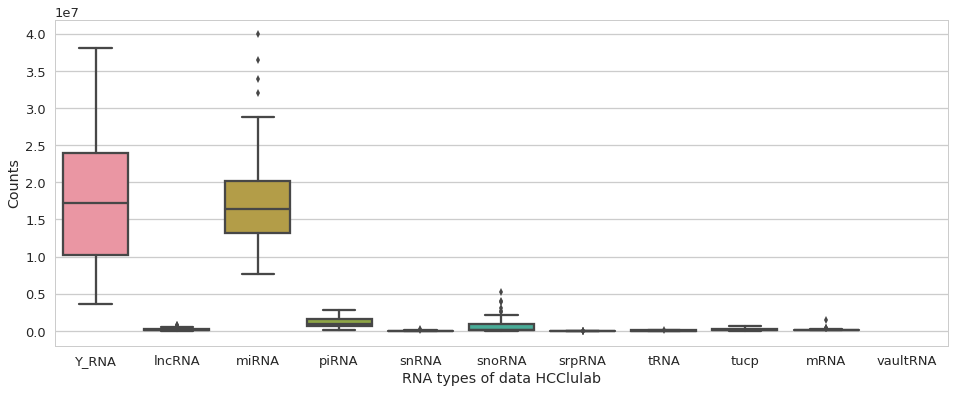

In [740]:
fig,ax=plt.subplots(1,figsize=(16,6))
sns.boxplot(data=newtable_hcc.loc[interestedrna].T)
ax.set_xlabel('RNA types of data HCClulab')
ax.set_ylabel('Counts')

Text(0,0.5,'Counts')

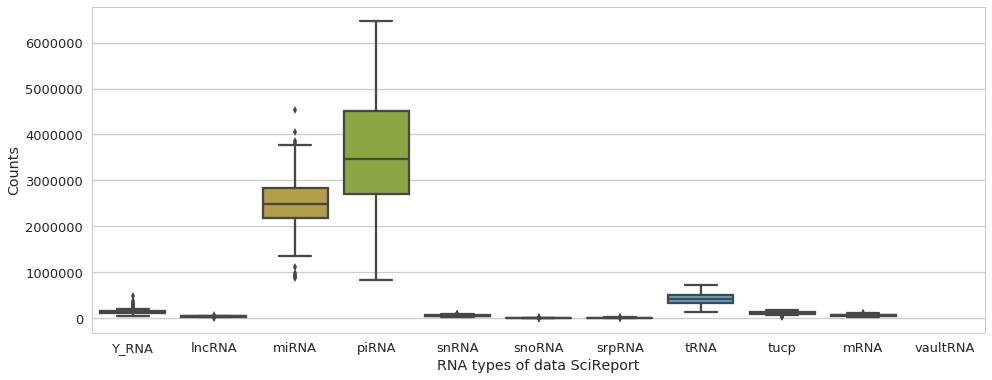

In [741]:
fig,ax=plt.subplots(1,figsize=(16,6))
sns.boxplot(data=newtable_gse.loc[interestedrna].T)
ax.set_xlabel('RNA types of data SciReport')
ax.set_ylabel('Counts')

Text(0,0.5,'Counts')

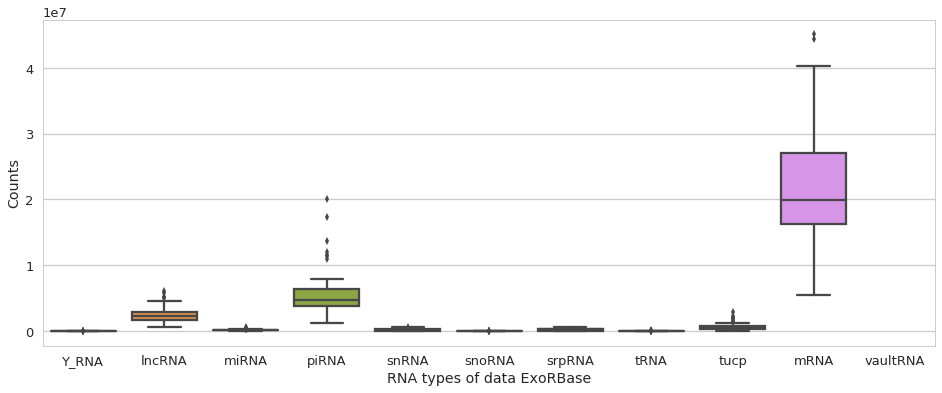

In [742]:
fig,ax=plt.subplots(1,figsize=(16,6))
sns.boxplot(data=exosamplernas_whole_qc.loc[interestedrna].T)
ax.set_xlabel('RNA types of data ExoRBase')
ax.set_ylabel('Counts')

In [327]:
### PCA of RNA types

In [328]:
newtable_hcc = pd.read_table('/home/chenxupeng/projects/training/data/18.new_hcc_lulab_stat/hcc_lulab.readsN.stat.tsv',
                     )
samplesnamesall_hcc = newtable_hcc.columns[1:]
newtable_hcc.index = newtable_hcc['sample']
newtable_hcc = newtable_hcc.iloc[:,1:]
newtable_hcc = newtable_hcc.loc[:,usesampleid_hcc]
newtable_hcc = newtable_hcc.rename(index={'tucpRNA': 'tucp'})
newtable_hcc = newtable_hcc.loc[interestedrna]
newtable_hcc.shape

(9, 43)

In [329]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler,RobustScaler

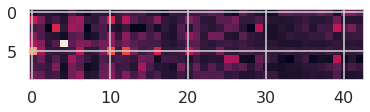

In [245]:
scaler = RobustScaler()
arr = np.array(newtable_hcc)
imshow(scaler.fit_transform(arr.T).T)

In [330]:
def scale(axis,table):
    '''
    axis: 0(by sample)/1(by feature)/2(both 0 and 1)
    '''
    scaler = StandardScaler()
    arr = np.array(table)
    if axis==0:
        return scaler.fit_transform(arr)
    elif axis==1:
        return scaler.fit_transform(arr.T).T
    elif axis==2:
        return scaler.fit_transform(scaler.fit_transform(arr).T).T

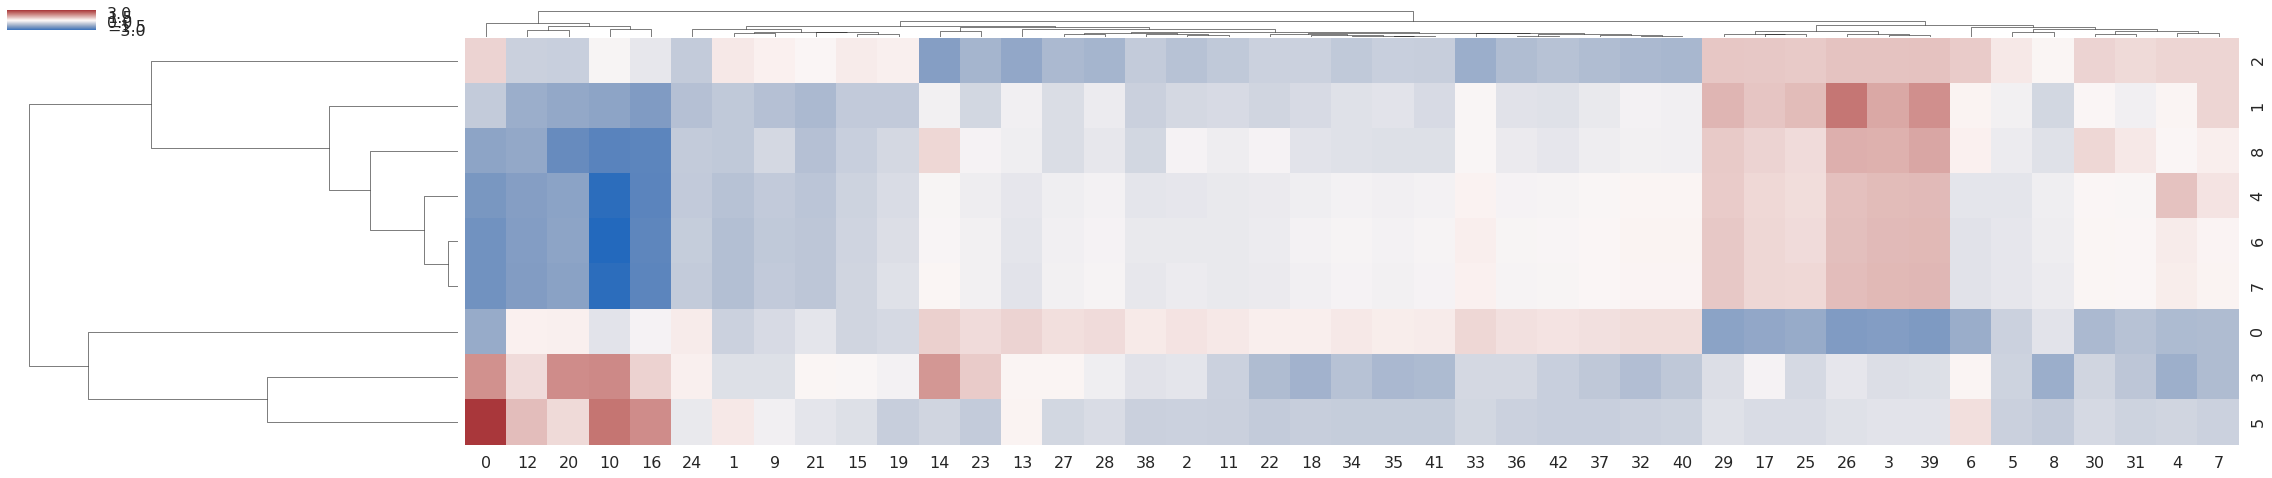

In [332]:
scaled_hcc = scale(2,newtable_hcc)
sns.clustermap(scaled_hcc,cmap='vlag',figsize=(40,8))

In [258]:
pca = PCA(n_components=2)
pca.fit(scaled_hcc.T+0.00001)
x_2d = pca.transform(scaled_hcc.T+0.00001)

In [333]:
x_2d.shape

(43, 2)

In [334]:
hccanno.index = hccanno['Sample_ID']

In [335]:
hccanno.head()

,Unnamed: 0,Sample_ID,Disease_status,Sex,Age,Tumor_size(cm),Multiple_tumor,Vascular_invasion,Satellite_nonules,AFP(ng/ml),...,PT,Stage-BCLC,RNA_mass(ng/mlplasma),Batch,spike-in,Seq-mode,DNase1,use,sampleuse,Disease_status_formal
Sample_ID,,,,,,,,,,,,,,,,,,,,,
lulab_249136_B,0,lulab_249136_B,HCC_before_surgery,M,43,2.8,No,No,0,559.6,...,10.1,A,27.63,7th_201803,NaN,NaN,NaN,1,1,HCC
lulab_385247_B,1,lulab_385247_B,HCC_before_surgery,M,54,4,No,No,1,19.61,...,12,A,33.45,4th_201801,NaN,NaN,NaN,1,1,HCC
lulab_423976_B,2,lulab_423976_B,HCC_before_surgery,F,60,_,No,Yes,0,4.58,...,15,C,32.66,3nd_201801,NaN,NaN,NaN,1,1,HCC
lulab_497411_B,3,lulab_497411_B,HCC_before_surgery,F,70,8,No,No,0,3.45,...,11.3,A,28.32,2nd_201712,0,PE150,N,1,1,HCC
lulab_497497_B,4,lulab_497497_B,HCC_before_surgery,M,44,12.3,Yes,No,0,3155,...,11.2,B,34.24,1st_201711,0,PE150,N,1,1,HCC


In [336]:
label_hcc_stage = np.array(hccanno[hccanno['use'] ==1]['Stage-BCLC'])
label_hcc_hcc = np.array(hccanno[hccanno['use'] ==1]['Disease_status_formal'])
label_hcc_stage[label_hcc_stage=='-'] ='Normal'
#label_hcc_stage[np.isin(samplesnamesall_hcc,usesampleid_hcc)]

In [337]:
label_hcc_stage

array(['A', 'A', 'C', 'A', 'B', 'B', 'B', 'A', 'A', 'B', 'A', 'B', 'A',
       'A', 'B', 'A', 'A', 'C', 'B', 'A', 'B', 'C', 'A', 'B', 'A', 'A',
       'B', 'C', 'A', 'A', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal'], dtype=object)

In [339]:
label_hcc_hcc[label_hcc_hcc !='HCC']= 'Normal'

In [340]:
label_hcc_hcc

array(['HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC',
       'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC',
       'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC', 'HCC',
       'HCC', 'HCC', 'HCC', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal'], dtype=object)

# exoRBase PCA
- 对于每个样本画不同RNA类型的read count分布图，**看在不同实验室**产生的数据之间是否存在明显差异。
- 每一个病是一个实验室！！
- 用alignment score

In [596]:
def get_exo_catergory(cateind =0):
    rootpath_exo = '/BioII/lulab_b/shared/projects/exRNA/published_exRNA/exosome_exoRBase/'
    exo_noraml = 'exosome_GSE100206_Healthy/'
    exo_paad = 'exosome_GSE100232_PAAD/'
    exo_hcc = 'exosome_GSE100207_HCC/'
    exo_crc = 'exosome_GSE100063_CRC/'
    exo_chd = 'exosome_GSE99985_CHD/'
    exo_category = [exo_noraml,exo_paad,exo_crc,exo_chd,exo_hcc]
    tabletest = pd.read_table(rootpath_exo+exo_category[cateind]+'stat/readsN.stat.tsv')
    tabletmp = tabletest[np.isin(tabletest['sample'],interestedrna)]
    tabletmp.index = tabletmp['sample']
    return tabletmp.iloc[:,1:]

In [597]:
#其中hcc和normal的其他在jingyi目录下
exosamplernas_paad = get_exo_catergory(cateind =1)  #PAAD  14
exosamplernas_crc = get_exo_catergory(cateind =2)   #CRC  12 
exosamplernas_chd = get_exo_catergory(cateind =3)   #CHD  6 
exosamplernas_hcc_part = get_exo_catergory(cateind =4) #HCC  4
exosamplernas_normal_part = get_exo_catergory(cateind =0) #normal  4

In [578]:
np.unique(exosampleclass[1],return_counts=True)

(array(['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD'], dtype=object),
 array([ 6, 12, 21, 32, 14]))

In [594]:
exotmp = pd.read_table(rootpath_exo).T
exotmp = exotmp.rename(index={ 'tucpRNA':'tucp'})
exosamplernas = exotmp.loc[interestedrna[:-1]]
exosamplernas

,SRR5712486,SRR5712487,SRR5712488,SRR5712489,SRR5712490,SRR5712491,SRR5712492,SRR5712493,SRR5712494,SRR5712495,...,SRR5712527,SRR5712528,SRR5712529,SRR5712530,SRR5712531,SRR5712532,SRR5712533,SRR5712534,SRR5712535,SRR5712536
Y_RNA,1556,8134,1502,4030,1026,4376,1398,1166,598,1160,...,7610,2054,2434,2162,2020,5064,2964,9024,4956,2862
lncRNA,2096844,2802994,2653194,3385758,4260872,1911918,2360734,2246522,2289484,2544516,...,2600608,1945720,1900734,2173678,1628762,1483452,1417402,1806368,1919048,2005754
miRNA,89716,222912,197866,223466,174660,213964,147990,138680,129856,184616,...,191008,131654,142418,128698,122358,144118,138220,169534,172988,146476
piRNA,3875274,4972248,6172700,7545520,6555696,4599158,3481368,3481204,3685354,3840916,...,6375282,4772080,5081960,4378054,4471792,6757552,5479052,4701272,5407588,4654358
snRNA,16444,78456,48028,66140,25760,71994,19642,24344,26152,29198,...,43504,22830,26920,50434,21422,88514,42680,33436,36272,28510
snoRNA,1450,11038,3352,10228,2322,8562,1716,2784,1934,2450,...,5786,3114,2336,3600,2434,8892,4476,5356,3930,3442
srpRNA,170486,332316,461516,425576,333452,234698,200734,294860,379850,330794,...,433542,260832,348150,249272,342970,490202,305152,239694,355478,318326
tRNA,5794,25628,4282,7086,10910,24932,12978,6326,6078,13798,...,11258,3588,4728,3826,3066,10160,7796,18576,10934,7214
tucp,612458,193638,452010,737872,1227944,189654,592844,342274,247576,373028,...,1073900,537576,579168,387462,406194,289552,335122,568502,457454,468888
mRNA,14752722,40262432,27328882,27668844,31884824,25737810,20850036,26301400,28337878,32826594,...,12313954,14168774,15695586,17484260,15497572,16601982,14992926,17598336,21086818,19669098


In [598]:
exosamplernas.shape,exosamplernas_normal_part.shape

((10, 45), (10, 4))

In [599]:
exosamplernas

,SRR5712486,SRR5712487,SRR5712488,SRR5712489,SRR5712490,SRR5712491,SRR5712492,SRR5712493,SRR5712494,SRR5712495,...,SRR5712527,SRR5712528,SRR5712529,SRR5712530,SRR5712531,SRR5712532,SRR5712533,SRR5712534,SRR5712535,SRR5712536
Y_RNA,1556,8134,1502,4030,1026,4376,1398,1166,598,1160,...,7610,2054,2434,2162,2020,5064,2964,9024,4956,2862
lncRNA,2096844,2802994,2653194,3385758,4260872,1911918,2360734,2246522,2289484,2544516,...,2600608,1945720,1900734,2173678,1628762,1483452,1417402,1806368,1919048,2005754
miRNA,89716,222912,197866,223466,174660,213964,147990,138680,129856,184616,...,191008,131654,142418,128698,122358,144118,138220,169534,172988,146476
piRNA,3875274,4972248,6172700,7545520,6555696,4599158,3481368,3481204,3685354,3840916,...,6375282,4772080,5081960,4378054,4471792,6757552,5479052,4701272,5407588,4654358
snRNA,16444,78456,48028,66140,25760,71994,19642,24344,26152,29198,...,43504,22830,26920,50434,21422,88514,42680,33436,36272,28510
snoRNA,1450,11038,3352,10228,2322,8562,1716,2784,1934,2450,...,5786,3114,2336,3600,2434,8892,4476,5356,3930,3442
srpRNA,170486,332316,461516,425576,333452,234698,200734,294860,379850,330794,...,433542,260832,348150,249272,342970,490202,305152,239694,355478,318326
tRNA,5794,25628,4282,7086,10910,24932,12978,6326,6078,13798,...,11258,3588,4728,3826,3066,10160,7796,18576,10934,7214
tucp,612458,193638,452010,737872,1227944,189654,592844,342274,247576,373028,...,1073900,537576,579168,387462,406194,289552,335122,568502,457454,468888
mRNA,14752722,40262432,27328882,27668844,31884824,25737810,20850036,26301400,28337878,32826594,...,12313954,14168774,15695586,17484260,15497572,16601982,14992926,17598336,21086818,19669098


In [603]:
exosamplernas_whole = pd.concat((exosamplernas,exosamplernas_paad ,exosamplernas_crc, exosamplernas_chd,
exosamplernas_hcc_part,exosamplernas_normal_part),axis=1) #normal  4

In [604]:
exosamplernas_whole

,SRR5712486,SRR5712487,SRR5712488,SRR5712489,SRR5712490,SRR5712491,SRR5712492,SRR5712493,SRR5712494,SRR5712495,...,SRR5679908,SRR5679909,SRR5712516,SRR5712517,SRR5712518,SRR5712519,SRR5712482,SRR5712483,SRR5712484,SRR5712485
Y_RNA,1556,8134,1502,4030,1026,4376,1398,1166,598,1160,...,3380,1824,4814,2004,5404,5076,818,734,1824,490
lncRNA,2096844,2802994,2653194,3385758,4260872,1911918,2360734,2246522,2289484,2544516,...,4460948,4519642,1730354,1803564,3091292,2978148,1842052,2385660,1491338,1518774
mRNA,14752722,40262432,27328882,27668844,31884824,25737810,20850036,26301400,28337878,32826594,...,17898794,9269190,16938672,18690034,23579286,24482450,17210938,15993128,26786240,16454310
miRNA,89716,222912,197866,223466,174660,213964,147990,138680,129856,184616,...,309430,217490,184704,214352,181670,176834,113166,89390,121732,55830
piRNA,3875274,4972248,6172700,7545520,6555696,4599158,3481368,3481204,3685354,3840916,...,20059086,11515668,4115102,4941342,7688372,7470476,4312952,3454990,3060872,2691360
snRNA,16444,78456,48028,66140,25760,71994,19642,24344,26152,29198,...,413600,359230,338844,364986,660794,584470,243396,258500,221162,209400
snoRNA,1450,11038,3352,10228,2322,8562,1716,2784,1934,2450,...,12934,6510,10846,9860,8464,5586,7270,2058,11666,1174
srpRNA,170486,332316,461516,425576,333452,234698,200734,294860,379850,330794,...,63526,48260,40058,28096,40984,48494,21940,17034,12954,14778
tRNA,5794,25628,4282,7086,10910,24932,12978,6326,6078,13798,...,6720,3018,4966,2574,4384,3826,1688,1300,1198,1112
tucp,612458,193638,452010,737872,1227944,189654,592844,342274,247576,373028,...,1979240,1215526,634252,592570,840116,763898,427928,630814,139876,201160


In [631]:
exosampleclass = pd.read_table('/Share/home/shibinbin/projects/exRNA/metadata/sample_classes.exoRBase.txt', header=None)
exosampleclass.index = exosampleclass[0]
exosampleclass = exosampleclass.iloc[:,1:]
np.unique(exosampleclass.loc[exosamplernas_whole.columns],return_counts=True)


(array(['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD'], dtype=object),
 array([ 6, 12, 21, 32, 14]))

In [608]:
np.array(exosamplernas_whole).shape

(10, 85)

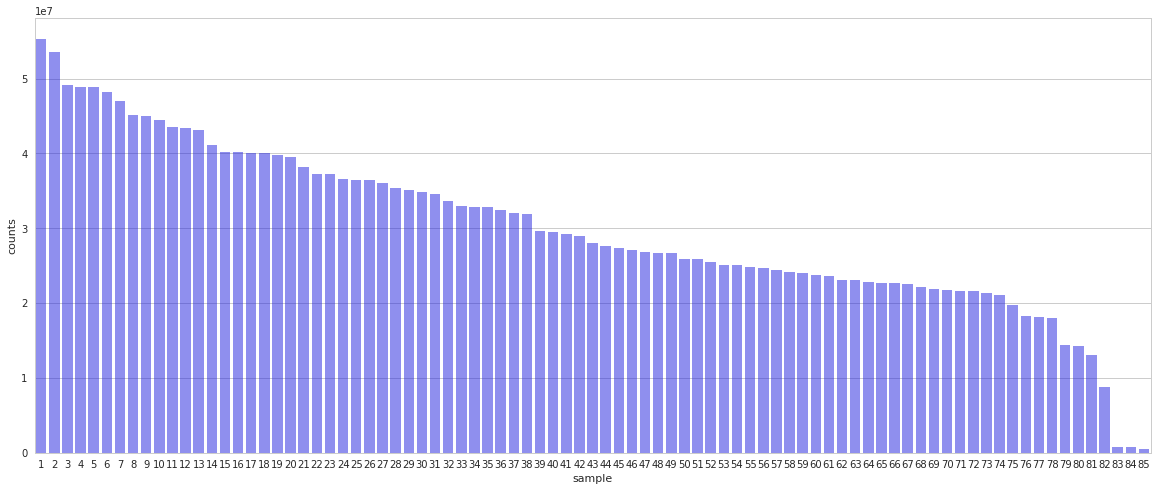

In [622]:
fig,ax=plt.subplots(figsize=(20,8))
count = np.sum(exosamplernas_whole,axis=0)
counttable =  pd.DataFrame(np.concatenate((np.arange(1,count.shape[0]+1).reshape(-1,1),
                ~np.sort(~count).reshape(-1,1)),axis=1),columns=['sample','counts'])
sns.barplot(x='sample',y='counts',data = counttable,color='b',alpha=0.5)

In [632]:
exosampleclass.loc[exosamplernas_whole.iloc[:,
            np.argsort(np.sum(exosamplernas_whole,axis=0))[:3]].columns]

,1
SRR5712506,Healthy
SRR5712511,Healthy
SRR5712513,Healthy


In [633]:
exoremovesamplenames = exosamplernas_whole.iloc[:,
            np.argsort(np.sum(exosamplernas_whole,axis=0))[:3]].columns

In [679]:
exoremovesamplenames

Index(['SRR5712506', 'SRR5712511', 'SRR5712513'], dtype='object')

In [640]:
exosamplernas_whole_qc = exosamplernas_whole.iloc[:,~np.isin(exosamplernas_whole.columns,exoremovesamplenames)]

In [646]:
ratio_exosamplernas_whole_qc = exosamplernas_whole_qc/np.sum(exosamplernas_whole_qc,axis=0)

In [648]:
ratio_exosamplernas_whole_qc

,SRR5712486,SRR5712487,SRR5712488,SRR5712489,SRR5712490,SRR5712491,SRR5712492,SRR5712493,SRR5712494,SRR5712495,...,SRR5679908,SRR5679909,SRR5712516,SRR5712517,SRR5712518,SRR5712519,SRR5712482,SRR5712483,SRR5712484,SRR5712485
Y_RNA,0.000072,0.000166,0.000040,0.000101,0.000023,0.000133,0.000051,0.000036,0.000017,0.000029,...,0.000075,0.000067,0.000201,0.000075,0.000150,0.000139,0.000034,0.000032,0.000057,0.000023
lncRNA,0.096974,0.057309,0.071087,0.084487,0.095798,0.057942,0.085319,0.068409,0.065219,0.063380,...,0.098677,0.166430,0.072090,0.067678,0.085630,0.081550,0.076174,0.104480,0.046825,0.071815
mRNA,0.682278,0.823198,0.732220,0.690435,0.716876,0.780003,0.753540,0.800906,0.807237,0.817659,...,0.395924,0.341327,0.705701,0.701331,0.653152,0.670398,0.711721,0.700421,0.841042,0.778041
miRNA,0.004149,0.004558,0.005301,0.005576,0.003927,0.006484,0.005349,0.004223,0.003699,0.004598,...,0.006845,0.008009,0.007695,0.008043,0.005032,0.004842,0.004680,0.003915,0.003822,0.002640
piRNA,0.179222,0.101662,0.165384,0.188287,0.147394,0.139381,0.125820,0.106006,0.104982,0.095671,...,0.443710,0.424051,0.171444,0.185421,0.212970,0.204563,0.178353,0.151312,0.096106,0.127261
snRNA,0.000760,0.001604,0.001287,0.001650,0.000579,0.002182,0.000710,0.000741,0.000745,0.000727,...,0.009149,0.013228,0.014117,0.013696,0.018304,0.016004,0.010065,0.011321,0.006944,0.009901
snoRNA,0.000067,0.000226,0.000090,0.000255,0.000052,0.000259,0.000062,0.000085,0.000055,0.000061,...,0.000286,0.000240,0.000452,0.000370,0.000234,0.000153,0.000301,0.000090,0.000366,0.000056
srpRNA,0.007885,0.006794,0.012365,0.010620,0.007497,0.007113,0.007255,0.008979,0.010820,0.008240,...,0.001405,0.001777,0.001669,0.001054,0.001135,0.001328,0.000907,0.000746,0.000407,0.000699
tRNA,0.000268,0.000524,0.000115,0.000177,0.000245,0.000756,0.000469,0.000193,0.000173,0.000344,...,0.000149,0.000111,0.000207,0.000097,0.000121,0.000105,0.000070,0.000057,0.000038,0.000053
tucp,0.028325,0.003959,0.012111,0.018412,0.027608,0.005748,0.021426,0.010423,0.007052,0.009292,...,0.043781,0.044760,0.026424,0.022236,0.023271,0.020918,0.017696,0.027627,0.004392,0.009512


In [653]:
np.zeros(82).astype('int')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [727]:
newtable_hcctmp = newtable_hcc.rename(index={ 'tucpRNA':'tucp'})
newtable_hcc = newtable_hcctmp.loc[interestedrna[:-1]]
newtable_hcc 

,249136-B,385247-B,423976-B,497411-B,497497-B,498127-B,498187-B,498221-B,507450-B,507468-B,...,Normal-2,Normal-3,Normal-4,Normal-5,Normal-6,Normal-7,Normal-8,mix1_combined_R1,mix2_combined_R1,mix3_combined_R1
sample,,,,,,,,,,,,,,,,,,,,,
Y_RNA,7210562,13571039,12923921,9816238,7340708,20736391,10728719,3647568,14878409,14590121,...,27639216,23817459,26033663,23777126,31999382,26255544,8348007,38032375,37892890,28841083
lncRNA,771916,441468,89119,204292,57538,499799,588631,125997,86685,292159,...,63361,84030,154699,80249,81256,113996,372439,58588,69085,68698
miRNA,18287392,20664655,7838132,39928790,15827656,32080121,28786106,7707059,18253406,19770012,...,12758552,15708346,18323768,13529907,18180408,17768598,36460575,19930498,26203229,17246308
piRNA,2602314,1473948,700810,609362,131343,1501080,1868786,153694,434323,1374613,...,879389,712977,687299,967136,920976,1420905,542763,960272,1003169,1028711
snRNA,102692,74289,14459,40138,254325,46679,70795,66442,44578,62149,...,5832,5849,11675,10397,8926,14556,18504,8637,12647,10648
snoRNA,5194177,2187458,181355,61474,34117,422045,2607731,15447,68431,1341406,...,155688,29334,57984,175702,42231,326027,35273,92966,33329,118086
srpRNA,5623,8006,4412,6865,4072,10856,7138,5023,3405,6513,...,1679,4137,5431,2144,2920,2721,12723,2400,3927,2006
tRNA,62323,58944,49214,90355,27003,86603,69736,23363,32186,76150,...,34507,37134,42144,42983,48548,59494,72713,45515,60606,50101
tucp,469489,387245,193216,247067,36529,440244,628386,82833,121738,416732,...,57708,60648,90598,123882,100022,120743,313347,45854,69881,90299


# stack bar plot

Text(0.5,1,'Stacked Bar plot of exoRBase RNAs')

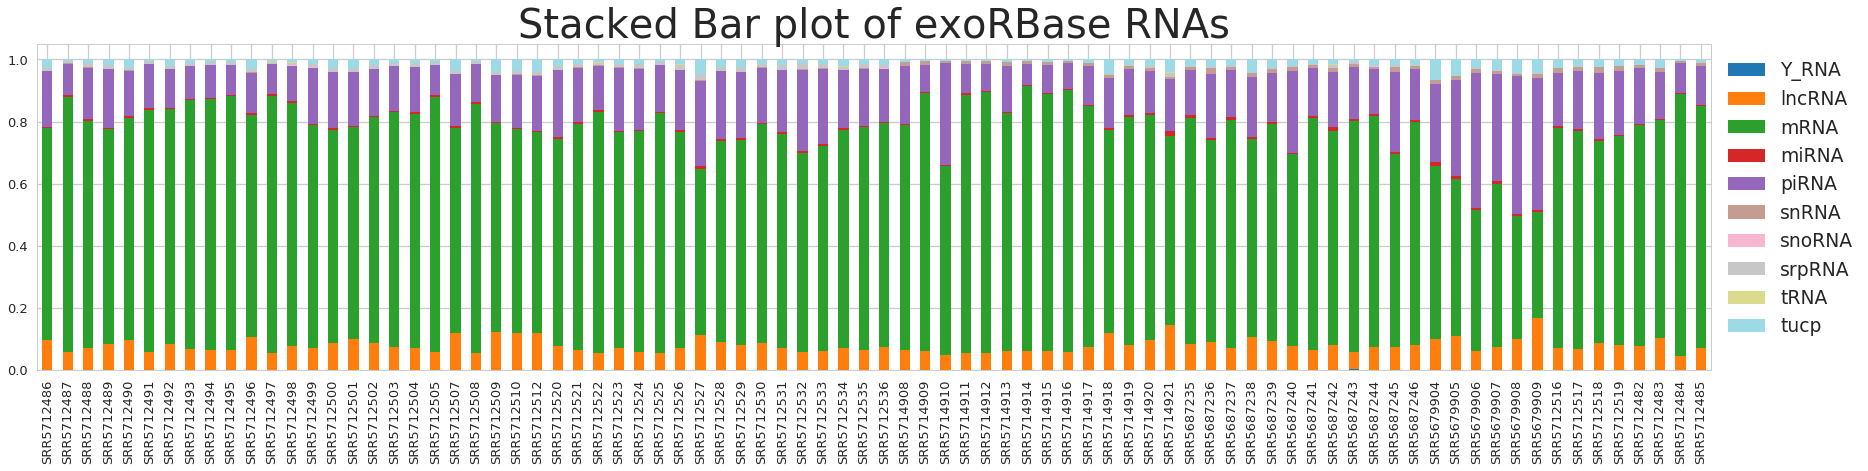

In [723]:
from matplotlib.colors import LinearSegmentedColormap
fig,ax=plt.subplots(figsize=(30,6))
ratio_exosamplernas_whole_qc.T.plot(kind='bar', stacked=True,ax=ax,
                                legend=True,colormap=matplotlib.colors.ListedColormap ( tableau20))
ax.legend(bbox_to_anchor=(1,1),fontsize='large')#, loc="lower right",
ax.set_title('Stacked Bar plot of exoRBase RNAs',fontsize=40)

Text(0.5,1,'Stacked Bar plot of exoRBase RNAs')

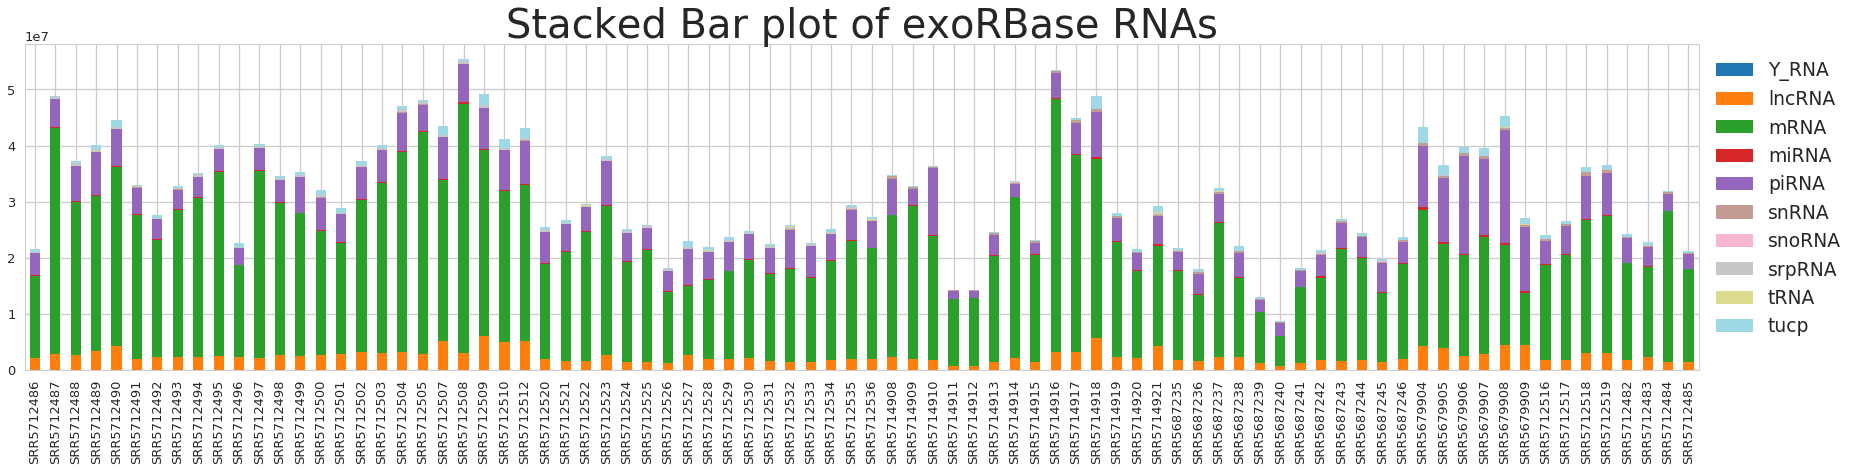

In [1051]:
from matplotlib.colors import LinearSegmentedColormap
fig,ax=plt.subplots(figsize=(30,6))
exosamplernas_whole_qc.T.plot(kind='bar', stacked=True,ax=ax,
                                legend=True,colormap=matplotlib.colors.ListedColormap ( tableau20))
ax.legend(bbox_to_anchor=(1,1),fontsize='large')#, loc="lower right",
ax.set_title('Stacked Bar plot of exoRBase RNAs',fontsize=40)

In [728]:
ratio_newtable_hcc  = newtable_hcc /np.sum(newtable_hcc ,axis=0)

Text(0.5,1,'Stacked Bar plot of HCClulab RNAs')

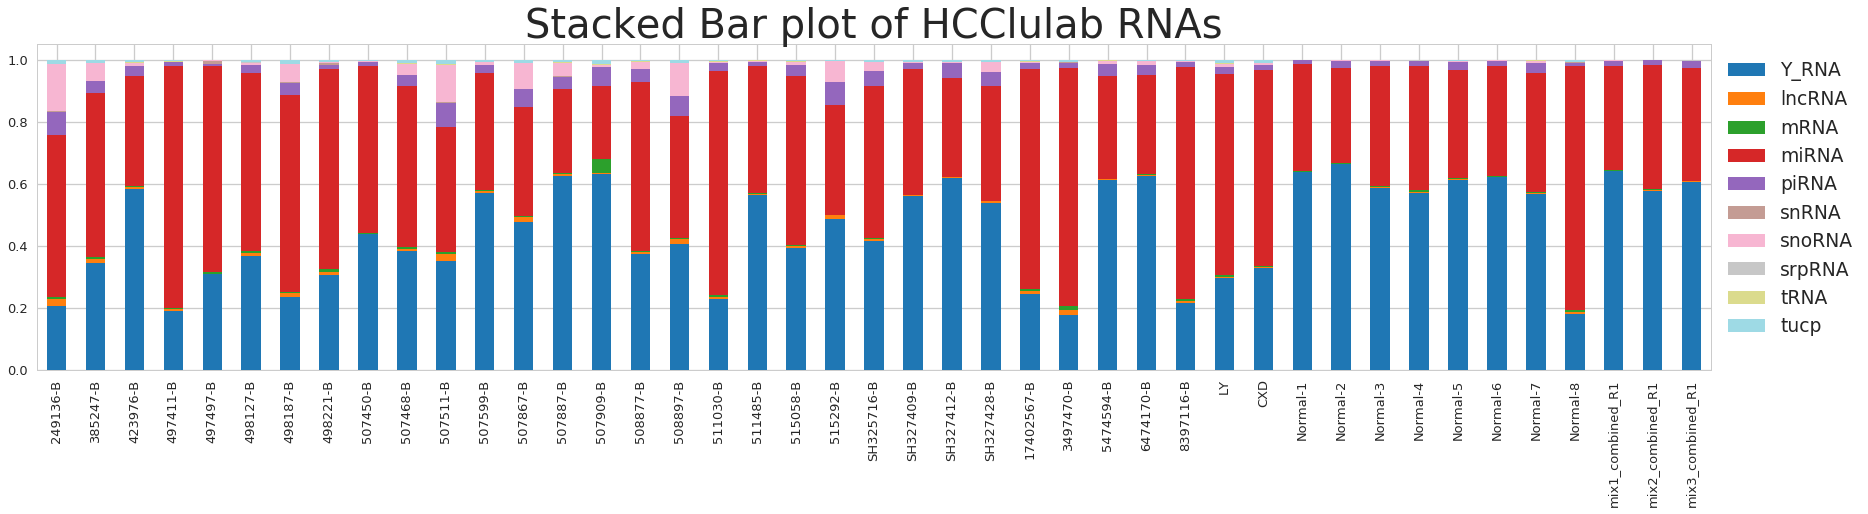

In [733]:
from matplotlib.colors import LinearSegmentedColormap
fig,ax=plt.subplots(figsize=(30,6))
ratio_newtable_hcc.loc[ratio_exosamplernas_whole_qc.index].T.plot(kind='bar', 
                                stacked=True,ax=ax,
            legend=True,colormap=matplotlib.colors.ListedColormap ( tableau20))
ax.legend(bbox_to_anchor=(1,1),fontsize='large')#, loc="lower right",
ax.set_title('Stacked Bar plot of HCClulab RNAs',fontsize=40)

Text(0.5,1,'Stacked Bar plot of HCClulab RNAs')

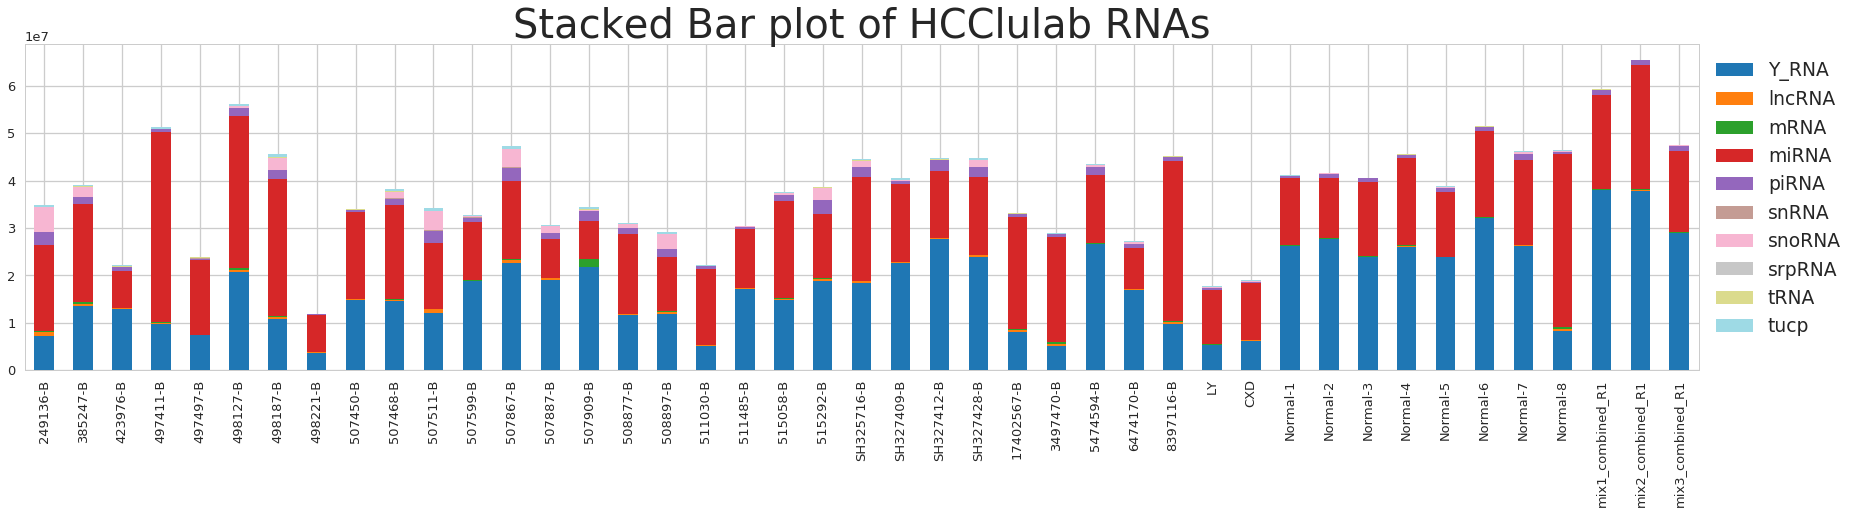

In [1052]:
from matplotlib.colors import LinearSegmentedColormap
fig,ax=plt.subplots(figsize=(30,6))
newtable_hcc.loc[ratio_exosamplernas_whole_qc.index].T.plot(kind='bar', 
                                stacked=True,ax=ax,
            legend=True,colormap=matplotlib.colors.ListedColormap ( tableau20))
ax.legend(bbox_to_anchor=(1,1),fontsize='large')#, loc="lower right",
ax.set_title('Stacked Bar plot of HCClulab RNAs',fontsize=40)

In [735]:
newtable_gse = newtable_gse.loc[interestedrna[:-1]]
newtable_gse

,Sample_1S10,Sample_1S11,Sample_1S12,Sample_1S13,Sample_1S14,Sample_1S15,Sample_1S16,Sample_1S17,Sample_1S18,Sample_1S19,...,Sample_PC34,Sample_PC35,Sample_PC36,Sample_PC3,Sample_PC4,Sample_PC5,Sample_PC6,Sample_PC7,Sample_PC8,Sample_PC9
Y_RNA,88835,127497,145142,90106,105377,87513,121418,144229,99332,107790,...,109816,101729,84469,156049,59227,115908,130839,110328,100963,125241
lncRNA,26733,38346,35639,25523,31489,21601,26915,37259,28952,26509,...,24776,23493,25332,37166,44244,49285,44738,36209,37819,33028
miRNA,2344713,2703185,2845495,2403853,1867128,1441732,2375036,2428861,1609241,2451537,...,2718423,1805776,2380238,3050008,2713810,2703903,2997784,1757344,2380145,2755247
piRNA,2816805,3302901,3218331,4268506,4871759,3989122,3917185,4638096,3041241,4066612,...,4787800,5307212,3074789,2005518,818385,2894462,3205091,1546672,2750730,2476995
snRNA,29122,43159,58263,41155,46119,28647,37586,57221,38062,37757,...,28982,30291,39265,57662,85369,91110,78246,57954,53383,54441
snoRNA,1779,2424,3768,2609,10770,1862,2523,3544,2443,2192,...,2362,2023,2054,2679,2878,3972,3339,2689,2643,2411
srpRNA,4706,6594,9020,4990,6203,4299,5344,8500,5269,4987,...,5092,5034,4604,6372,7166,10108,8704,4850,5580,5501
tRNA,332556,376539,473974,470160,581740,451309,440644,560626,351976,409799,...,547823,560771,388783,285722,133388,357776,366369,193189,361039,279649
tucp,84492,122205,136251,92331,108782,74765,95228,126570,92871,90884,...,93393,89333,81141,108978,124151,152762,147094,90095,107706,102612
mRNA,51080,75211,90614,40932,47424,34856,46901,71520,55873,46549,...,44260,39668,43978,69939,112072,113917,90941,71234,58408,58025


Text(0.5,1,'Stacked Bar plot of SciRep RNAs')

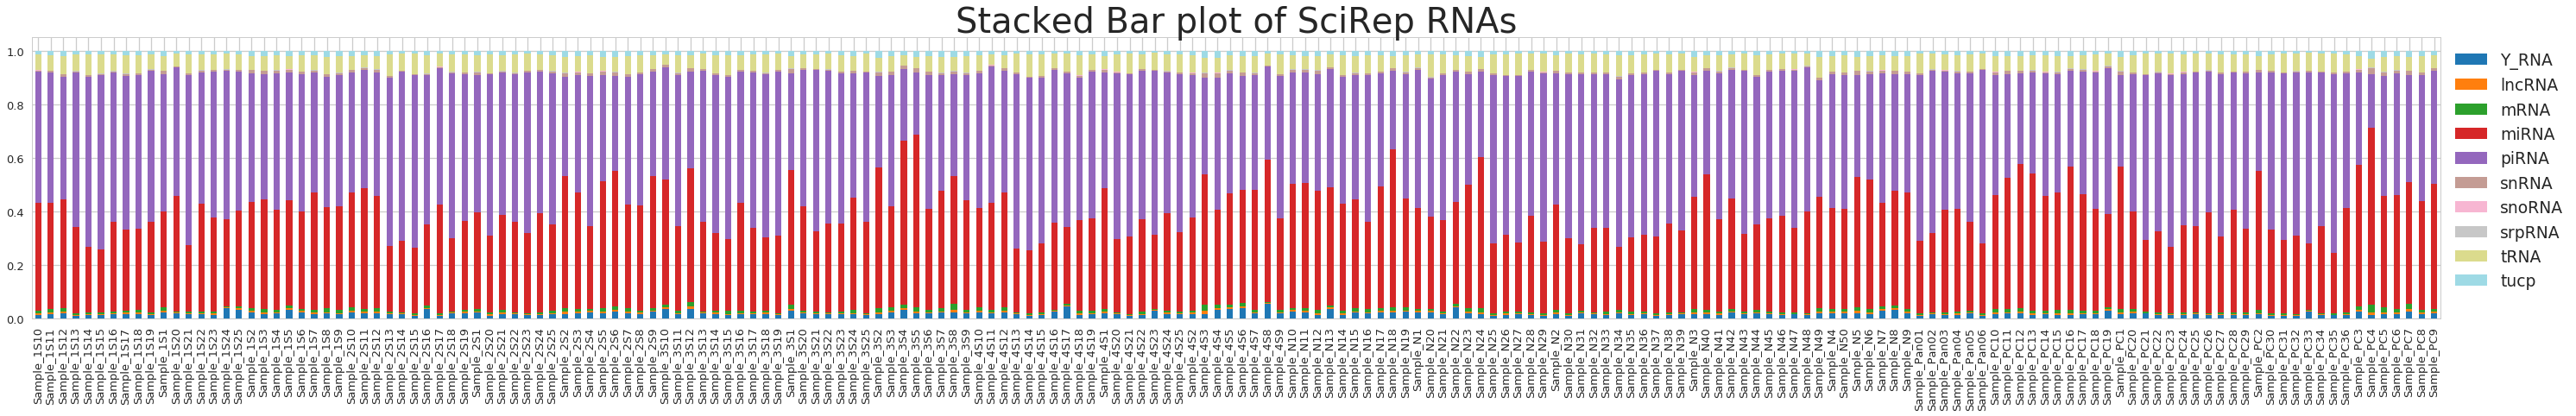

In [739]:
ratio_newtable_gse  = newtable_gse /np.sum(newtable_gse ,axis=0)
from matplotlib.colors import LinearSegmentedColormap
fig,ax=plt.subplots(figsize=(50,6))
ratio_newtable_gse.loc[ratio_exosamplernas_whole_qc.index].T.plot(kind='bar', 
                                stacked=True,ax=ax,
            legend=True,colormap=matplotlib.colors.ListedColormap ( tableau20))
ax.legend(bbox_to_anchor=(1,1),fontsize='large')#, loc="lower right",
ax.set_title('Stacked Bar plot of SciRep RNAs',fontsize=40)

Text(0.5,1,'Stacked Bar plot of SciRep RNAs')

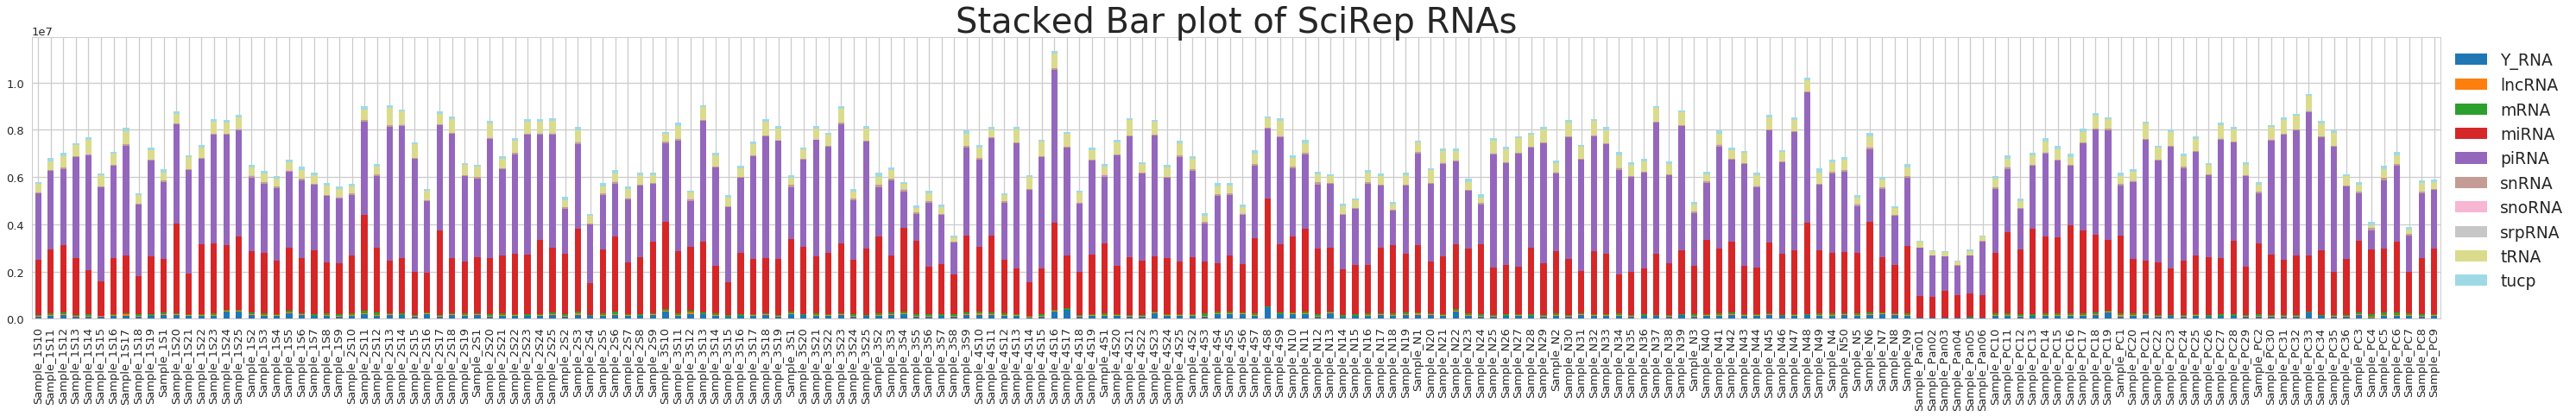

In [1053]:
ratio_newtable_gse  = newtable_gse /np.sum(newtable_gse ,axis=0)
from matplotlib.colors import LinearSegmentedColormap
fig,ax=plt.subplots(figsize=(50,6))
newtable_gse.loc[ratio_exosamplernas_whole_qc.index].T.plot(kind='bar', 
                                stacked=True,ax=ax,
            legend=True,colormap=matplotlib.colors.ListedColormap ( tableau20))
ax.legend(bbox_to_anchor=(1,1),fontsize='large')#, loc="lower right",
ax.set_title('Stacked Bar plot of SciRep RNAs',fontsize=40)

# plot PCA

In [698]:
exosampleclass.loc[ratio_exosamplernas_whole_qc.columns].head()

,1
SRR5712486,Healthy
SRR5712487,Healthy
SRR5712488,Healthy
SRR5712489,Healthy
SRR5712490,Healthy


In [695]:
np.unique(exosampleclass.loc[ratio_exosamplernas_whole_qc.columns][1])

array(['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD'], dtype=object)

In [696]:
np.nonzero(exosampleclass.loc[ratio_exosamplernas_whole_qc.columns][1] == 'Healthy')[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 78, 79, 80, 81])

In [1085]:
def alignment_score(X, y, K=10):
    N = X.shape[0]
    nn = NearestNeighbors(K)
    nn.fit(X)
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    score = 1.0 - (np.mean(same_class_fractions) - K/N)/(K - K/N)
    print (same_class_fractions.shape,np.mean(same_class_fractions),K/N,neighbor_classes)
    return score
def knn_score(X, y, K=10):
    N = X.shape[0]
    assert K < N
    nn = NearestNeighbors(K)
    nn.fit(X)
    
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    
    classes, counts = np.unique(y, return_counts=True)
    classes = np.argmax(y.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    counts = np.take(counts, classes)
    mean_r = K/(N - 1)*counts
    max_r = np.minimum(K, counts)
    #print (same_class_fractions.shape,mean_r.shape,max_r.shape)
    #scores = (np.mean(same_class_fractions) - mean_r)/(max_r - mean_r)
    scores = (same_class_fractions - mean_r)/(max_r - mean_r)
    #print(scores)
    return scores.mean()

In [911]:
X_pca.shape,exosampleclass.loc[ratio_exosamplernas_whole_qc.columns.values].values.shape

((82, 10), (82, 1))

(82,) (82,) (82,)
Alignment score: 0.453465962842862


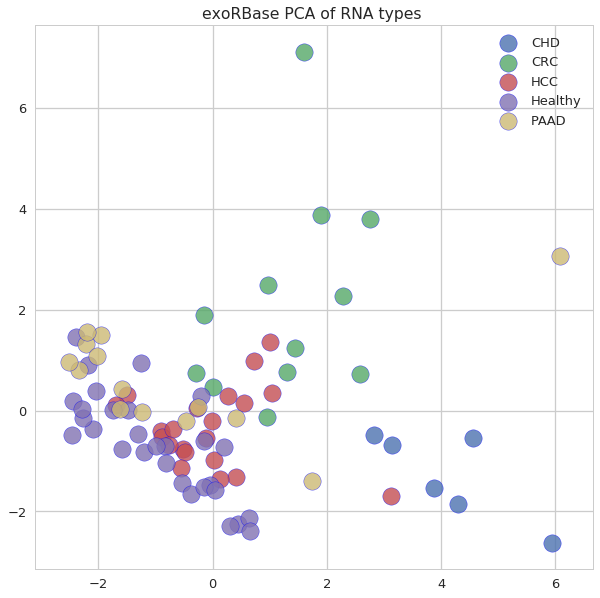

In [912]:
X = np.log2(ratio_exosamplernas_whole_qc + 1).T
#X = cpm_original.T.copy()
X = StandardScaler().fit_transform(X)
#pca = TSNE(2)
pca = PCA()
#pca.fit(X)
X_pca = pca.fit_transform(X)

fig, ax = plt.subplots(figsize=(10, 10))
for label, color in zip(['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD'], 
                            tableau20[np.array([2,0,5,7,8])]):
#for label in ['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD']:
    indices = np.nonzero(exosampleclass.loc[ratio_exosamplernas_whole_qc.columns][1] == label)[0]
    ax.scatter(X_pca[indices, 0], X_pca[indices, 1], s=300,alpha=0.8 ,edgecolors = 'b',label=label)
ax.legend()
ax.set_title('exoRBase PCA of RNA types ')

print('Alignment score: {}'.format(knn_score(X_pca, exosampleclass.loc[ratio_exosamplernas_whole_qc.columns.values].values.ravel() )))

(82,) (82,) (82,)
Alignment score: 0.49656377386107153


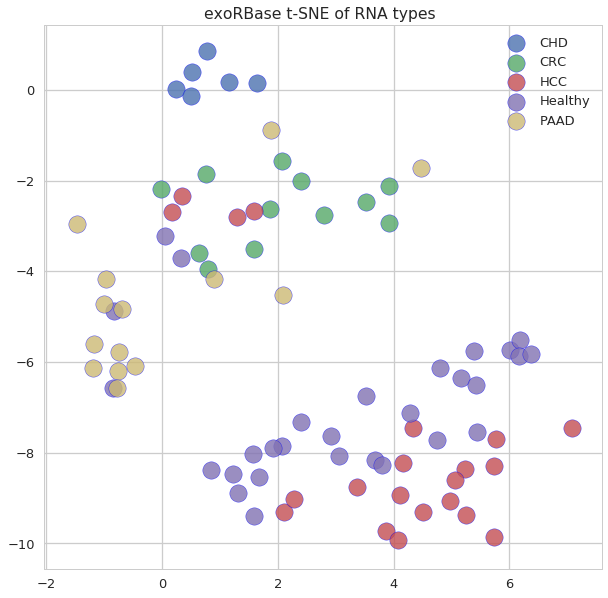

In [914]:
X = np.log2(ratio_exosamplernas_whole_qc + 1).T
#X = cpm_original.T.copy()
X = StandardScaler().fit_transform(X)
#pca = TSNE(2)
pca = TSNE()
#pca.fit(X)
X_pca = pca.fit_transform(X)

fig, ax = plt.subplots(figsize=(10, 10))
for label, color in zip(['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD'], 
                            tableau20[np.array([2,0,5,7,8])]):
#for label in ['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD']:
    indices = np.nonzero(exosampleclass.loc[ratio_exosamplernas_whole_qc.columns][1] == label)[0]
    ax.scatter(X_pca[indices, 0], X_pca[indices, 1], s=300,alpha=0.8 ,edgecolors = 'b',label=label)
ax.legend()
ax.set_title('exoRBase t-SNE of RNA types ')

print('Alignment score: {}'.format(knn_score(X_pca, exosampleclass.loc[ratio_exosamplernas_whole_qc.columns.values].values.ravel() )))

In [707]:
from sklearn.decomposition import PCA
def plot_PCA(data_whole,labels,title,dataclass='stage'):
    pca = PCA(n_components=2)
    pca.fit(data_whole+0.00001)
    x_2d = pca.transform(data_whole+0.00001)
    fig,ax = plt.subplots(1,figsize=(10,8))
    if dataclass=='stage':
        labs = ['A','Normal']
    elif dataclass=='hcc':
        labs = ['HCC','Normal']
    elif dataclass =='allstage':
        labs = ['Normal','A','B','C']
    for i, c, label in zip(np.arange(0,len(labs)), tableau20[np.array([2,0,5,7,8])][:len(labs)], labs):
        #print (i,c,label)
        ax.scatter(x_2d[labels == labs[i], 0], x_2d[labels == labs[i], 1], c=c, label=label,s=160,edgecolors = 'b')
    ax.legend(bbox_to_anchor=(1.3,0.55),fontsize=20)
    ax.set_title(title)
    #return x_2d
from sklearn.manifold import TSNE
def plot_tsne(data_whole,labels,title,dataclass='stage'):
    tsne = TSNE(n_components=2, random_state=0)
    x_2d = tsne.fit_transform(data_whole)
    fig,ax = plt.subplots(1,figsize=(10,8))
    if dataclass=='stage':
        labs = ['A','Normal']
    elif dataclass=='hcc':
        labs = ['HCC','Normal']
    elif dataclass =='allstage':
        labs = ['Normal','A','B','C']
    for i, c, label in zip(np.arange(0,len(labs)), tableau20[np.array([2,0,5,7,8])][:len(labs)], labs):
        #print (i,c,label)
        ax.scatter(x_2d[labels == labs[i], 0], x_2d[labels == labs[i], 1], c=c, label=label,s=160,edgecolors = 'b')
    ax.legend(bbox_to_anchor=(1.3,0.55),fontsize=20)
    ax.set_title(title)
    #ax.set_xticks(np.arange(np.min(x_2d[:,0]),np.max(x_2d[:,0]),20))
    #ax.set_yticks(np.arange(np.min(x_2d[:,1]),np.max(x_2d[:,1]),20))
    plt.show()
    #return x_2d
plot_PCA(scaled_hcc.T,label_hcc_stage,'HCC lulab PCA',dataclass='stage')
plot_tsne(scaled_hcc.T,label_hcc_hcc,'HCC lulab t-SNE',dataclass='hcc')

(43, 2)

In [467]:
tableexp_gse = pd.read_table('data/gse_exp_ly.csv',delimiter=',',index_col='geneid')

In [469]:
gseanno  = pd.read_table('data/GSE_expreesionmx_binary_annotation.txt',
              delimiter=',')

In [471]:
tableexp_gse.loc[:,gseanno['Sample_ID']].to_csv('data/gse_exp_ly.csv')

In [434]:
tableexp_gse.index = tableexp_gse.iloc[:,0]
tableexp_gse.shape
tableexp_gse  = tableexp_gse.iloc[:,1:]
newtable_gse.shape
tableexp_gse.columns = newtable_gse.columns
tableexp_gse.to_csv('data/gse_exp_ly.csv')

(3460, 193)

In [473]:
tableexp_gse.head()

,Sample_1S10,Sample_1S11,Sample_1S12,Sample_1S13,Sample_1S14,Sample_1S15,Sample_1S16,Sample_1S17,Sample_1S18,Sample_1S19,...,Sample_PC34,Sample_PC35,Sample_PC36,Sample_PC3,Sample_PC4,Sample_PC5,Sample_PC6,Sample_PC7,Sample_PC8,Sample_PC9
geneid,,,,,,,,,,,,,,,,,,,,,
A-NT2RP7011570,11,10,6,0,9,8,0,10,10,11,...,0,3,0,0,4,4,0,2,4,2
C-ADG04260,1,1,1,1,1,2,1,2,1,1,...,1,1,1,1,0,1,1,1,1,1
C-ADG07684,2,3,5,3,5,4,5,4,4,7,...,4,3,3,4,5,3,2,1,0,4
C-ASTRO3000154,9,9,10,5,11,11,12,10,9,14,...,4,5,4,5,8,5,4,4,0,5
C-BRACE2001543,0,0,0,0,0,0,0,1,0,0,...,2,2,2,6,2,4,4,1,2,2


(15, 192)

# Normalization
用已知稳定表达的miRNA作为内参。三套数据，
- 无mi，pi；
- 所有的，用mi内参normalize。   
三个数据集都做，给斌斌  `miR1228,miR23,miR451a,miR15,miR16,miR21`
- exo的不能做，内参测到的基本都是0

In [781]:
referencegene = np.array(['MIR1228','MIR23','MIR451a','MIR15','MIR16','MIR21'])

In [991]:
gsecount = pd.read_table('/Share/home/shibinbin/projects/exRNA/output/count_matrix/GSE71008.txt')
hcc_peak_iter_count = pd.read_table('/Share/home/shibinbin/projects/exRNA/output/count_matrix/piranha_peaks_iterative.txt')
hcc_peak_count = pd.read_table('/Share/home/shibinbin/projects/exRNA/output/count_matrix/piranha_peaks.txt')
hcc_full_count = pd.read_table('/Share/home/shibinbin/projects/exRNA/output/count_matrix/transcripts_exrna.txt')
exorbase = pd.read_table('/Share/home/shibinbin/projects/exRNA/output/count_matrix/exoRBase.txt')


In [1230]:
np.unique(pd.read_table('/Share/home/shibinbin/projects/exRNA/output/count_matrix/piranha_peaks_iterative.txt').columns,return_counts=True)

(array(['10515058-A', '12402567-A', '13515292-A', '17402567-B', '249136-B',
        '333874-A', '3497470-B', '385247-A', '385247-B', '423976-B',
        '482592-A', '486978-A', '497411-B', '497497-B', '498127-B',
        '498187-A', '498187-B', '498191-A', '498221-A', '498221-B',
        '507450-B', '507468-B', '507511-B', '507599-B', '507867-B',
        '507887-B', '507909-B', '508877-B', '508897-B', '508955-A',
        '509155-A', '509442-A', '509970-A', '510199-A', '510470-A',
        '511030-B', '511485-B', '515058-A', '515058-B', '515292-A',
        '515292-B', '5474594-B', '6474170-B', '8397116-B', 'CXD', 'LY',
        'Normal-1', 'Normal-2', 'Normal-3', 'Normal-4', 'Normal-5',
        'Normal-6', 'Normal-7', 'Normal-8', 'SH325716-B', 'SH327409-B',
        'SH327412-B', 'SH327428-B', 'SRR3103242', 'SRR3103243',
        'SRR3103244', 'SRR3103245', 'SRR3103246', 'SRR3103247',
        'SRR3103248', 'SRR3103249', 'SRR3103250', 'SRR3103251',
        'SRR3103252', 'SRR3103253', 'SRR310

In [491]:
gsecount['transcript'].head()

0    ENST00000473358.1|MIR1302-2HG-202|1544
1     ENST00000469289.1|MIR1302-2HG-201|843
2    ENST00000466430.5|AL627309.1-201|31638
3    ENST00000471248.1|AL627309.1-203|18221
4    ENST00000610542.1|AL627309.1-205|12999
Name: transcript, dtype: object

In [493]:
hcc_peak_iter_count['peak'].head()

0    peak_1|12954|tRNA
1    peak_2|12956|tRNA
2    peak_3|12958|tRNA
3    peak_4|12962|tRNA
4    peak_5|12969|tRNA
Name: peak, dtype: object

In [494]:
hcc_peak_count['peak']

0    peak_1|12979|tRNA
1    peak_2|12985|tRNA
2    peak_3|12991|tRNA
3    peak_4|12993|tRNA
4    peak_5|13011|tRNA
Name: peak, dtype: object

In [1215]:
np.savetxt('data/peakname.txt',np.concatenate((np.array(hcc_peak_count['peak']),
                                               np.array(hcc_peak_iter_count['peak'])))
                                               ,fmt='%s')

In [496]:
hcc_full_count['transcript'].head()

0        ENST00000417324.1|FAM138A-201|1528
1    ENST00000466430.5|AL627309.1-201|31638
2    ENST00000471248.1|AL627309.1-203|18221
3    ENST00000610542.1|AL627309.1-205|12999
4      ENST00000493797.1|AL627309.2-201|550
Name: transcript, dtype: object

In [497]:
exorbase['transcript'].head()

0    ENST00000473358.1|MIR1302-2HG-202|1544
1     ENST00000469289.1|MIR1302-2HG-201|843
2        ENST00000417324.1|FAM138A-201|1528
3    ENST00000466430.5|AL627309.1-201|31638
4    ENST00000471248.1|AL627309.1-203|18221
Name: transcript, dtype: object

In [962]:
referenceanno

,chrom,start,end,name,score,strand,gene_id,transcript_id,gene_name,transcript_name,gene_type,transcript_type
196038,chr12,57194503,57194576,ENSG00000221365.1,0,+,ENSG00000221365.1,ENST00000408438.1,MIR1228,MIR1228-201,miRNA,miRNA
232998,chr13,50048972,50049061,ENSG00000208006.1,0,-,ENSG00000208006.1,ENST00000385271.1,MIR16-1,MIR16-1-201,miRNA,miRNA
232999,chr13,50049118,50049201,ENSG00000283785.1,0,-,ENSG00000283785.1,ENST00000607334.3,MIR15A,MIR15A-201,miRNA,miRNA
384550,chr17,28861368,28861440,ENSG00000284565.1,0,-,ENSG00000284565.1,ENST00000385059.1,MIR451A,MIR451A-201,miRNA,miRNA
450540,chr19,13836586,13836659,ENSG00000207980.1,0,-,ENSG00000207980.1,ENST00000385245.1,MIR23A,MIR23A-201,miRNA,miRNA
656006,chr3,160404587,160404685,ENSG00000207779.1,0,+,ENSG00000207779.1,ENST00000385045.1,MIR15B,MIR15B-201,miRNA,miRNA
656007,chr3,160404744,160404825,ENSG00000198987.1,0,+,ENSG00000198987.1,ENST00000362117.1,MIR16-2,MIR16-2-201,miRNA,miRNA
935750,chr9,95085207,95085304,ENSG00000207563.1,0,+,ENSG00000207563.1,ENST00000384832.1,MIR23B,MIR23B-201,miRNA,miRNA
960774,chrX,20017087,20017187,ENSG00000264566.3,0,-,ENSG00000264566.3,ENST00000579846.3,MIR23C,MIR23C-201,miRNA,miRNA


In [1219]:
referencegene_peak = np.array(['peak_751|MIR1228-201|miRNA','peak_1193|MIR1228-201|miRNA','peak_665|MIR16-1-201|miRNA',
          'peak_1061|MIR16-1-201|miRNA','peak_1025|MIR15A-201|miRNA','peak_1804|MIR15A-201|miRNA',
          'peak_618|MIR451A-201|miRNA','peak_1002|MIR451A-201|miRNA','peak_655|MIR23A-201|miRNA',
          'peak_1049|MIR23A-201|miRNA','peak_609|MIR15B-201|miRNA','peak_993|MIR15B-201|miRNA',
          'peak_186|MIR16-2-201|miRNA','peak_402|MIR16-2-201|miRNA','peak_534|MIR23B-201|miRNA',
          'peak_898|MIR23B-201|miRNA'])

In [1231]:
np.savetxt('data/reference_transcript_name.txt',reference_transcript_id,fmt='%s')
np.savetxt('data/reference_peak_name.txt',referencegene_peak,fmt='%s')

In [1221]:
hcc_peak_iter_count.index = hcc_peak_iter_count['peak']
hcc_peak_iter_count  = hcc_peak_iter_count.iloc[:,1:]

In [1225]:
hcc_peak_count.index = hcc_peak_count['peak']
hcc_peak_count  = hcc_peak_count.iloc[:,1:]

In [1233]:
hcc_peak_count.loc[referencegene_peak].shape,hcc_peak_iter_count.loc[referencegene_peak].shape

((16, 63), (16, 81))

In [3]:
import pandas as pd
geneannotation = pd.read_table('/Share/home/shibinbin/projects/exRNA/data/annotation/transcript_table/all.txt')

In [4]:
geneannotation.head()

,chrom,start,end,name,score,strand,gene_id,transcript_id,gene_name,transcript_name,gene_type,transcript_type
0,chr1,14629,14657,piR-hsa-18438,0,+,piR-hsa-18438,piR-hsa-18438,piR-hsa-18438,piR-hsa-18438,piRNA,piRNA
1,chr1,17368,17436,ENSG00000278267.1,0,-,ENSG00000278267.1,ENST00000619216.1,MIR6859-1,MIR6859-1-201,miRNA,miRNA
2,chr1,18535,18563,piR-hsa-7508,0,+,piR-hsa-7508,piR-hsa-7508,piR-hsa-7508,piR-hsa-7508,piRNA,piRNA
3,chr1,26805,26836,piR-hsa-23387,0,-,piR-hsa-23387,piR-hsa-23387,piR-hsa-23387,piR-hsa-23387,piRNA,piRNA
4,chr1,29553,31097,ENSG00000243485.5,0,+,ENSG00000243485.5,ENST00000473358.1,MIR1302-2HG,MIR1302-2HG-202,lncRNA,lncRNA


In [793]:
tttt = np.array([geneannotation['gene_name'][i].split('-') for i in tqdm(range(geneannotation.shape[0]))])
mirna = []
for i in tqdm(range(geneannotation.shape[0])):
    if tttt[i][0][:3] =='miR':
        mirna.append(tttt[i][0])
    #if np.where(referencegene==tttt[i][0])[0].shape[0] !=0:
    #    print (referencegene,tttt[i][0])

HBox(children=(IntProgress(value=0, max=1005093), HTML(value='')))

In [795]:
np.array(mirna)[np.isin(mirna,referencegene)]

array(['MIR1228', 'MIR16', 'MIR21', 'MIR16'], dtype='<U10')

In [800]:
uniquename,uniquecount = np.unique(np.array([tttt[i][0] for i in range(tttt.shape[0])]),return_counts=True)
np.savetxt('data/genename.txt',np.array(geneannotation['gene_name']),fmt='%s')
uniquename[np.argsort(uniquecount)]
np.sort(uniquecount)

'MIR1228', 'MIR16-1','MIR16-2','MIR21',
'MIR23A','MIR23B','MIR23C','MIR451A','MIR15A','MIR15B'
- mir21不行？

In [880]:
referencegenes = np.array(['MIR1228', 'MIR16-1','MIR16-2','MIR21',
                           'MIR23A','MIR23B','MIR23C','MIR451A','MIR15A','MIR15B'])

In [860]:
referenceanno = geneannotation.iloc[np.isin(geneannotation['gene_name'],referencegenes)]
referenceanno

In [818]:
gsecount_firstname = np.array([gsecount['transcript'][i].split('|')[0] for i in  range(gsecount['transcript'].shape[0])
                              ])

In [876]:
reference_transcript_id = np.array(['ENST00000408438.1|MIR1228-201|73',
          'ENST00000385271.1|MIR16-1-201|89',
          'ENST00000607334.3|MIR15A-201|83',
          'ENST00000385059.1|MIR451A-201|72',
          'ENST00000362134.1|MIR21-201|72',
          'ENST00000385245.1|MIR23A-201|73',
          'ENST00000385045.1|MIR15B-201|98',
          'ENST00000362117.1|MIR16-2-201|81',
          'ENST00000384832.1|MIR23B-201|97',
       'ENST00000579846.3|MIR23C-201|100'])

In [924]:
def get_reference_counts(origintable):
    count_reference = origintable.loc[reference_transcript_id]
    count_reference['transcript']  =  referencegenes
    count_reference.index = count_reference['transcript']
    count_reference = count_reference.iloc[:,1:]
    return count_reference

In [1006]:
exorbase.index = exorbase['transcript']
exorbase = exorbase.iloc[:,1:]

In [1014]:
hcc_full_count.index = hcc_full_count['transcript']
hcc_full_count = hcc_full_count.iloc[:,1:]

In [881]:
gsecount_reference = gsecount.loc[reference_transcript_id]
gsecount_reference['transcript']  =  referencegenes
gsecount_reference.index = gsecount_reference['transcript']
gsecount_reference = gsecount_reference.iloc[:,1:]

In [1015]:
hcc_full_count

,10515058-A,12402567-A,13515292-A,17402567-B,249136-B,333874-A,3497470-B,385247-A,385247-B,423976-B,...,Normal-3,Normal-4,Normal-5,Normal-6,Normal-7,Normal-8,SH325716-B,SH327409-B,SH327412-B,SH327428-B
transcript,,,,,,,,,,,,,,,,,,,,,
ENST00000417324.1|FAM138A-201|1528,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ENST00000466430.5|AL627309.1-201|31638,1,1,0,1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
ENST00000471248.1|AL627309.1-203|18221,6,0,0,2,6,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000610542.1|AL627309.1-205|12999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000493797.1|AL627309.2-201|550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENST00000484859.1|AL627309.5-201|8234,28,10,37,29,28,10,13,22,15,4,...,2,0,1,1,4,11,10,13,4,5
ENST00000466557.6|AL627309.5-203|27477,3,0,0,2,1,0,0,1,1,1,...,0,1,0,1,0,1,1,0,1,1
ENST00000491962.1|AL627309.5-204|2879,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ENST00000496488.1|AL627309.4-201|1080,1,0,2,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


## 统计内参，做normalization
先看看是不是每个reference都稳定
- 量化一下  standard scale 再画boxplot
- 用这些normalize和直接用cpm画PCA看看差别

In [1281]:
gsecount_reference.index

Index(['MIR1228', 'MIR16-1', 'MIR16-2', 'MIR21', 'MIR23A', 'MIR23B', 'MIR23C',
       'MIR451A', 'MIR15A', 'MIR15B'],
      dtype='object', name='transcript')

In [1282]:
def plot_reference_box(table,dataname,normalize=True):
    fig,ax=plt.subplots(figsize=(20,8))
    nonnan = np.where(np.sum(pd.isna(table),axis=1)==0)[0]
    
    #print (nonnan)
    table = table.iloc[nonnan,:]
    table_log =  np.log2(table+1)
    if not normalize:
        sns.boxplot(data = table.T,ax=ax)
    else:
        #stdscale = StandardScaler()
        sns.violinplot(data =table_log.T,ax=ax)
        ax.set_xticklabels(gsecount_reference.index)
    cv = np.std(table_log,axis=1)/np.mean(table_log,axis=1)
    cv_labels  = np.array([str(np.round(s, 2)) for s in cv])
    pos = range(cv.shape[0])
    medians = np.max(table_log.T)
    for tick,label in zip(pos,ax.get_xticklabels()):
        ax.text(pos[tick], medians[tick] + 1.0, cv_labels[tick], 
            horizontalalignment='center', size='x-small', color='b', weight='semibold')
    
    ax.set_title(dataname+ 'Reference genes')

In [1118]:
table = gsecount_reference
wholetable = gsecount.iloc[:,1:]
nonnan = np.where(np.sum(pd.isna(table),axis=1)==0)[0] 

table = table.iloc[nonnan,:]
table_log =  np.log2(table+1)
cv = np.std(table_log,axis=1)/np.mean(table_log,axis=1)

table_log_whole = np.log2(wholetable+1)
cv_whole = np.std(table_log_whole,axis=1)/np.mean(table_log_whole,axis=1)


In [1120]:
cv_whole.shape,cv.shape

((89619,), (10,))

In [1121]:
np.concatenate((np.repeat('reference',cv.shape[0]),np.repeat('others',cv_whole.shape[0]))).shape

(89629,)

In [1122]:
np.concatenate((cv,cv_whole)).shape

(89629,)

In [1165]:
def plot_reference_cv_comparison(table,dataname,wholetable,normalize=True):
    fig,ax=plt.subplots(figsize=(6,6))
    nonnan = np.where(np.sum(pd.isna(table),axis=1)==0)[0] 
    #print (nonnan)
    table = table.iloc[nonnan,:]
    table_log =  np.log2(table+1)
    cv = np.std(table_log,axis=1)/np.mean(table_log,axis=1)
    
    table_log_whole = np.log2(wholetable+1)
    cv_whole = np.std(table_log_whole,axis=1)/np.mean(table_log_whole,axis=1)
    tablenew1 = pd.DataFrame(np.concatenate((np.repeat('reference',cv.shape[0]),np.repeat('others',cv_whole.shape[0]))).reshape(-1,1))
    tablenew2 = pd.DataFrame(np.concatenate((cv,cv_whole)).reshape(-1,1))
    tablenew = pd.concat((tablenew1,tablenew2),axis=1)   
    tablenew.columns = ['Genes','Coefficient of Variation']  
    #tablenew  = pd.to_numeric(tablenew.iloc[:,1])
    sns.violinplot(data =tablenew,x='Genes',y = 'Coefficient of Variation',ax=ax)
    ax.set_title(dataname+ 'Reference genes')

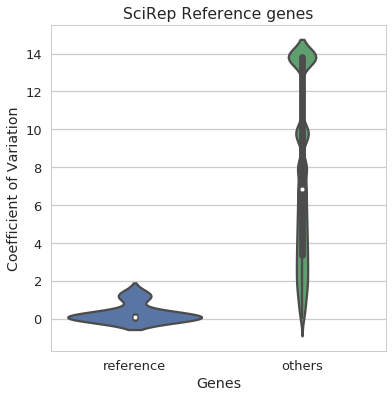

In [1166]:
plot_reference_cv_comparison(gsecount_reference,'SciRep ',gsecount.iloc[:,1:],normalize=True)

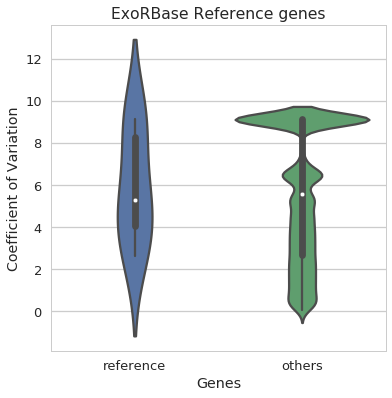

In [1168]:
plot_reference_cv_comparison(get_reference_counts(exorbase).iloc[:,:-1],'ExoRBase ',exorbase.iloc[:,1:],normalize=True)

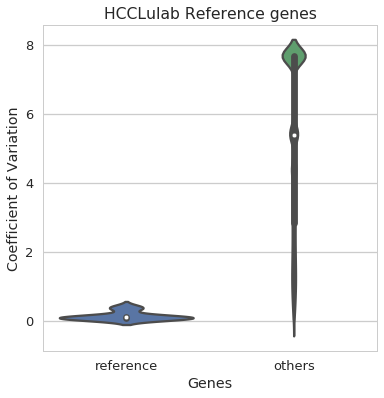

In [1170]:
plot_reference_cv_comparison(get_reference_counts(hcc_full_count).iloc[:,:-1],'HCCLulab ',hcc_full_count.iloc[:,1:],normalize=True)

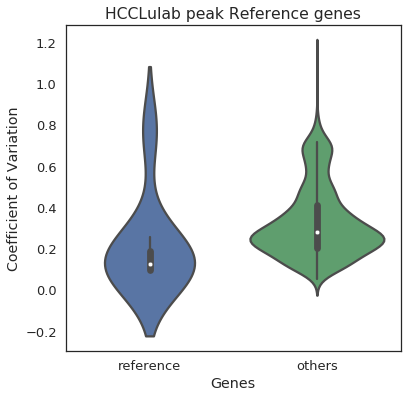

In [1235]:
plot_reference_cv_comparison(hcc_peak_count.loc[referencegene_peak],'HCCLulab peak ',
                             hcc_peak_count,normalize=True)

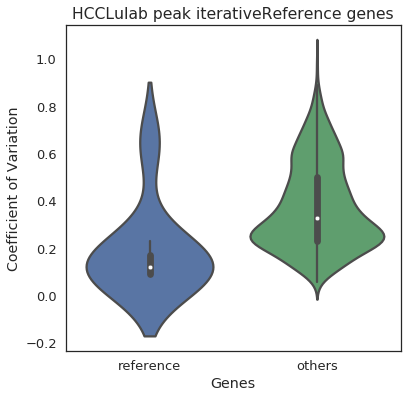

In [1236]:
plot_reference_cv_comparison(hcc_peak_iter_count.loc[referencegene_peak],'HCCLulab peak iterative',
                             hcc_peak_iter_count,normalize=True)

In [1207]:
def plot_reference_density(table,dataname,wholetable,normalize=True):
    fig,ax=plt.subplots(figsize=(10,6))
    nonnan = np.where(np.sum(pd.isna(table),axis=1)==0)[0] 
    #print (nonnan)
    table = table.iloc[nonnan,:]
    table_log =  np.log2(table+1)
    cv = np.std(table_log,axis=1)/np.mean(table_log,axis=1)
    
    table_log_whole = np.log2(wholetable+1)
    cv_whole = np.std(table_log_whole,axis=1)/np.mean(table_log_whole,axis=1)
    sns.kdeplot(cv_whole, shade=True)
    cv = np.sort(cv)
    for tick in cv:
        ax.axvline(x=tick, color='g',linewidth=0.4, linestyle='--')
    #if dataname = 'HCCLulab ':
    #for i in range(cv.shape[0]):
    #    ax.text(cv[i], 0.1+i*0.03, np.round(cv[i],2), 
    #        horizontalalignment='center', size='x-small', color='b', weight='semibold')
    ax.set_title(dataname+ 'Reference genes')

In [1211]:
sns.set_context(contexts[1])
sns.set_style(styles[0])

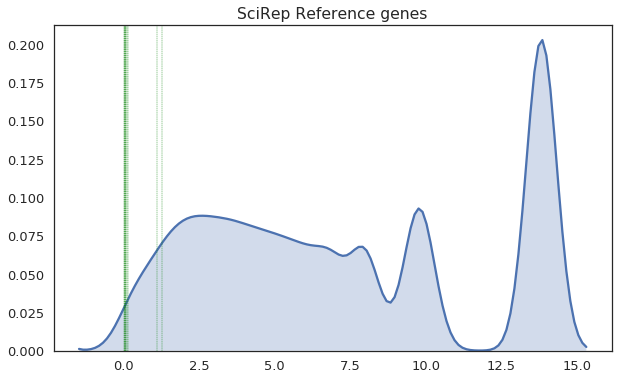

In [1212]:
plot_reference_density(gsecount_reference,'SciRep ',gsecount.iloc[:,1:],normalize=True)

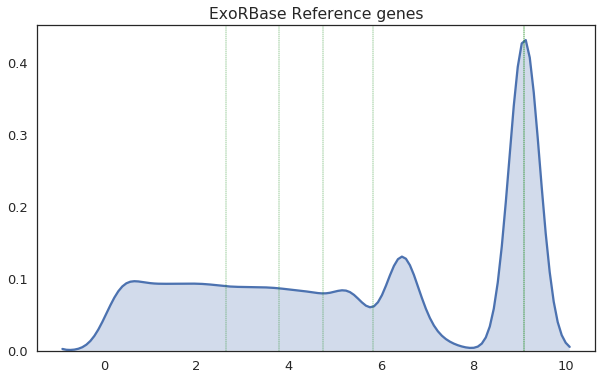

In [1213]:
plot_reference_density(get_reference_counts(exorbase).iloc[:,:-1],'ExoRBase ',exorbase.iloc[:,1:],normalize=True)

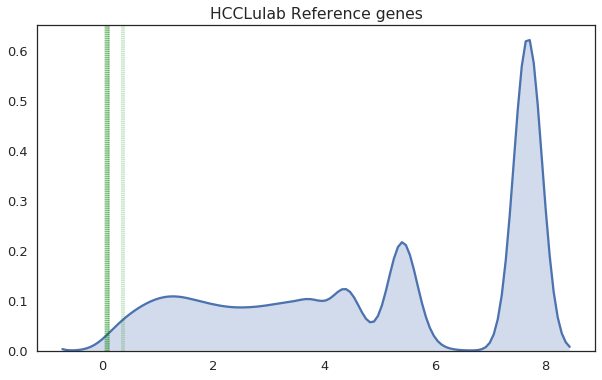

In [1214]:
plot_reference_density(get_reference_counts(hcc_full_count).iloc[:,:-1],'HCCLulab ',hcc_full_count.iloc[:,1:],normalize=True)

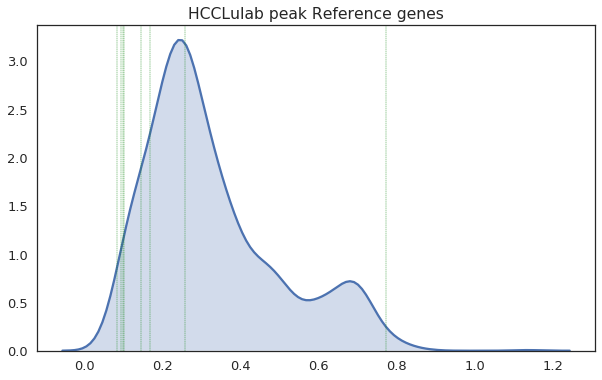

In [1237]:
plot_reference_density(hcc_peak_count.loc[referencegene_peak],'HCCLulab peak ',
                             hcc_peak_count,normalize=True)

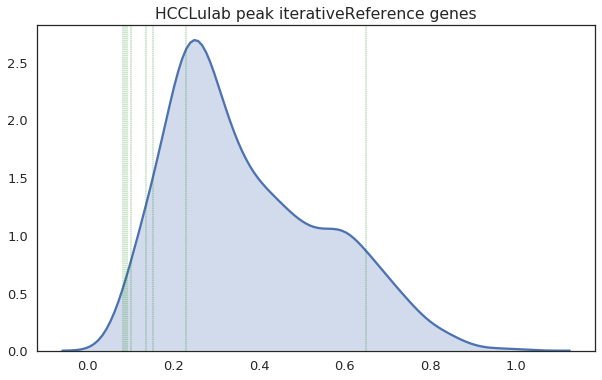

In [1239]:
plot_reference_density(hcc_peak_iter_count.loc[referencegene_peak],'HCCLulab peak iterative',
                             hcc_peak_iter_count,normalize=True)

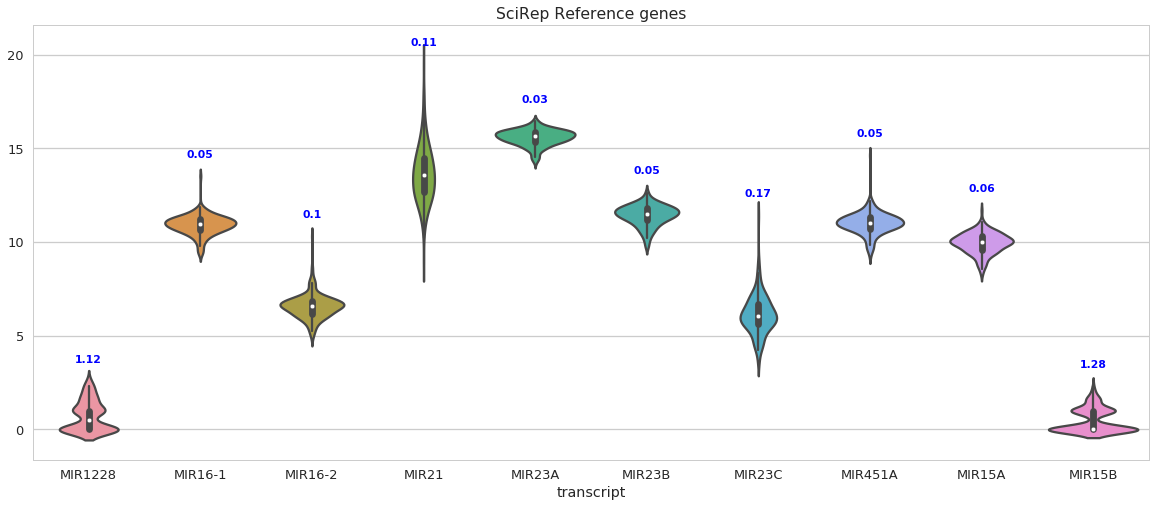

In [1103]:
plot_reference_box(gsecount_reference,'SciRep ',normalize=True)

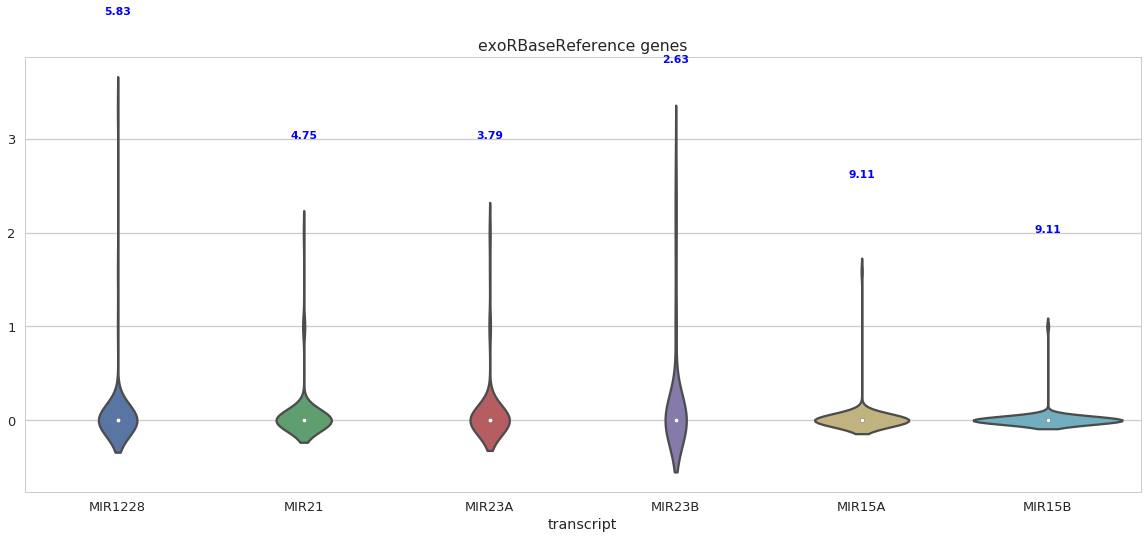

In [1104]:
plot_reference_box(get_reference_counts(exorbase).iloc[:,:-1],'exoRBase',normalize=True)

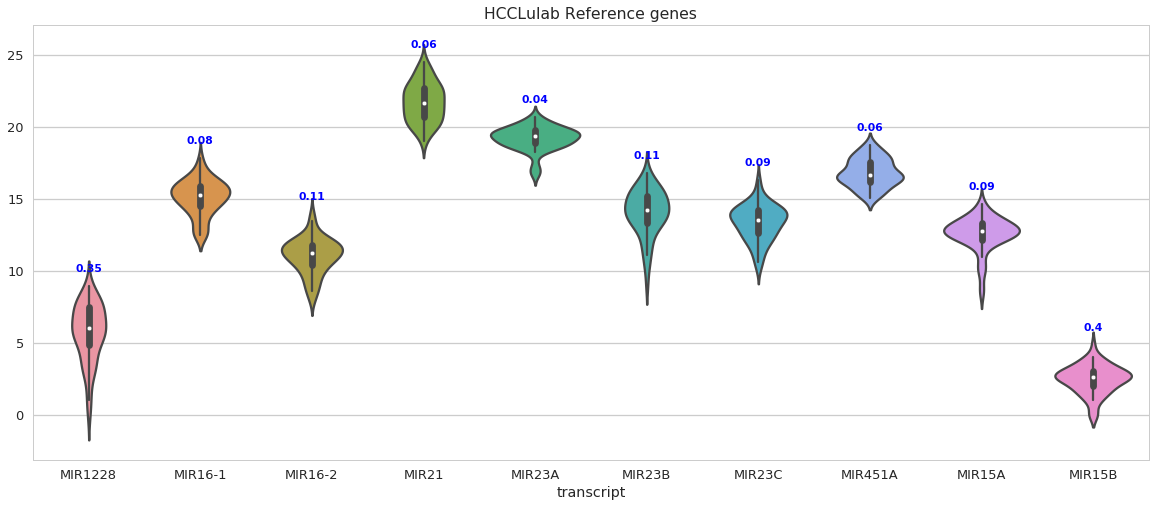

In [1105]:
plot_reference_box(get_reference_counts(hcc_full_count).iloc[:,:-1],'HCCLulab ',normalize=True)

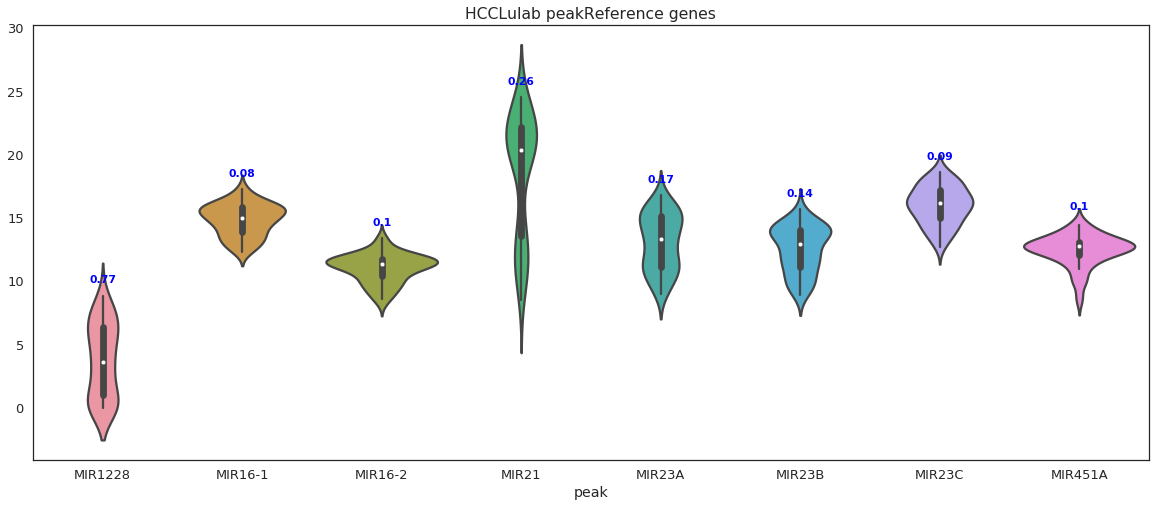

In [1283]:
plot_reference_box(hcc_peak_count.loc[referencegene_peak],'HCCLulab peak',normalize=True)

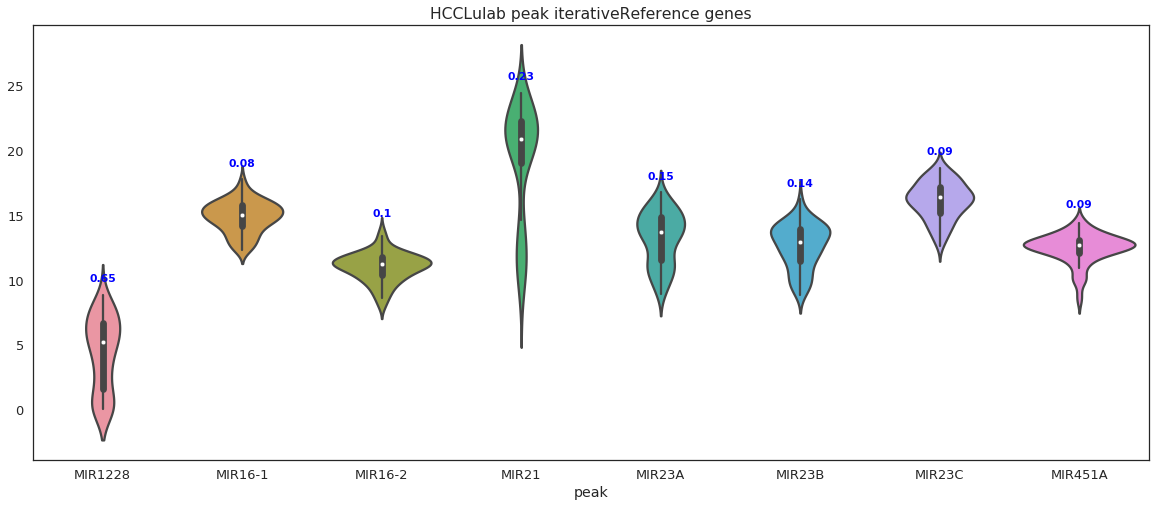

In [1284]:
plot_reference_box(hcc_peak_iter_count.loc[referencegene_peak],'HCCLulab peak iterative',normalize=True)

## 用这些miRNA做normalization，
比较直接CPM的结果，画PCA，比较score
四套数据

In [999]:
samples_GSE = pd.read_table('/Share/home/shibinbin/projects/exRNA/metadata/sample_classes.GSE71008.txt', header=None)
samples_GSE.index = samples_GSE[0]

In [996]:
gsecount = pd.read_table('/Share/home/shibinbin/projects/exRNA/output/count_matrix/GSE71008_original.txt', sep='\t', index_col=0)

In [1011]:
gsecount = pd.read_table('/Share/home/shibinbin/projects/exRNA/output/count_matrix/GSE71008.txt')

看起来scireport 52套是离群值？

In [1365]:
table = gsecount
table_reference = gsecount_reference.iloc[:,np.delete(np.arange(gsecount_reference.shape[1]),52)]
#table_reference = gsecount_reference
gse_ratiotable = table[table_reference.columns]*1e6/np.sum(table_reference,axis=0)

In [1368]:
def get_normalized_reference(table,reference_table):
     return table[table_reference.columns]*1e6/np.sum(table_reference,axis=0)

In [1370]:
gse_ref_normalized =  get_normalized_reference(gsecount,
                            gsecount_reference.iloc[:,np.delete(np.arange(gsecount_reference.shape[1]),52)])

In [1422]:
gsecount_reference.iloc[:,np.delete(np.arange(gsecount_reference.shape[1]),52)].sum().head()

Sample_1S10     47509
Sample_1S11     64827
Sample_1S12     45146
Sample_1S13     87739
Sample_1S14    108083
dtype: int64

In [1428]:
gsecount.index = gsecount['transcript']

In [1433]:
gsecount_reference.iloc[:,np.delete(np.arange(gsecount_reference.shape[1]),52)].columns

Index(['Sample_1S10', 'Sample_1S11', 'Sample_1S12', 'Sample_1S13',
       'Sample_1S14', 'Sample_1S15', 'Sample_1S16', 'Sample_1S17',
       'Sample_1S18', 'Sample_1S19',
       ...
       'Sample_PC34', 'Sample_PC35', 'Sample_PC36', 'Sample_PC3', 'Sample_PC4',
       'Sample_PC5', 'Sample_PC6', 'Sample_PC7', 'Sample_PC8', 'Sample_PC9'],
      dtype='object', length=191)

In [1435]:
gse_ref_normalized  = gsecount.loc[:,gsecount_reference.iloc[:,np.delete(np.arange(gsecount_reference.shape[1]),52)].columns]*1e6/gsecount_reference.iloc[:,np.delete(np.arange(gsecount_reference.shape[1]),52)].sum()

In [1436]:
gse_ref_normalized.head()

,Sample_1S10,Sample_1S11,Sample_1S12,Sample_1S13,Sample_1S14,Sample_1S15,Sample_1S16,Sample_1S17,Sample_1S18,Sample_1S19,...,Sample_PC34,Sample_PC35,Sample_PC36,Sample_PC3,Sample_PC4,Sample_PC5,Sample_PC6,Sample_PC7,Sample_PC8,Sample_PC9
transcript,,,,,,,,,,,,,,,,,,,,,
ENST00000473358.1|MIR1302-2HG-202|1544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
ENST00000469289.1|MIR1302-2HG-201|843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
ENST00000466430.5|AL627309.1-201|31638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.407773,0.0,0.0
ENST00000471248.1|AL627309.1-203|18221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
ENST00000610542.1|AL627309.1-205|12999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [1437]:
gse_ref_normalized.to_csv('data/expression_matrix/scirep_ref_normalization.csv')

In [1381]:
hccfull_ref_normalized =  get_normalized_reference(hcc_full_count.loc[:,usesampleid_hcc],
        get_reference_counts(hcc_full_count).loc[:,usesampleid_hcc])

hccpeak_ref_normalized =  get_normalized_reference(hcc_peak_count.loc[:,usesampleid_hcc],
                           hcc_peak_count.loc[referencegene_peak].loc[:,usesampleid_hcc])

hccpeakiter_ref_normalized =  get_normalized_reference(hcc_peak_iter_count.loc[:,usesampleid_hcc],
                           hcc_peak_iter_count.loc[referencegene_peak].loc[:,usesampleid_hcc])


In [1382]:
gse_ref_normalized.to_csv('data/expression_matrix/scirep_ref_normalization.csv')
hccfull_ref_normalized.to_csv('data/expression_matrix/hccfull_ref_normalization.csv')
hccpeak_ref_normalized.to_csv('data/expression_matrix/hccpeak_ref_normalization.csv')
hccpeakiter_ref_normalized.to_csv('data/expression_matrix/hccpeakiter_ref_normalization.csv')

Alignment score: -0.38676752760522387
Alignment score: -0.3697490380479241


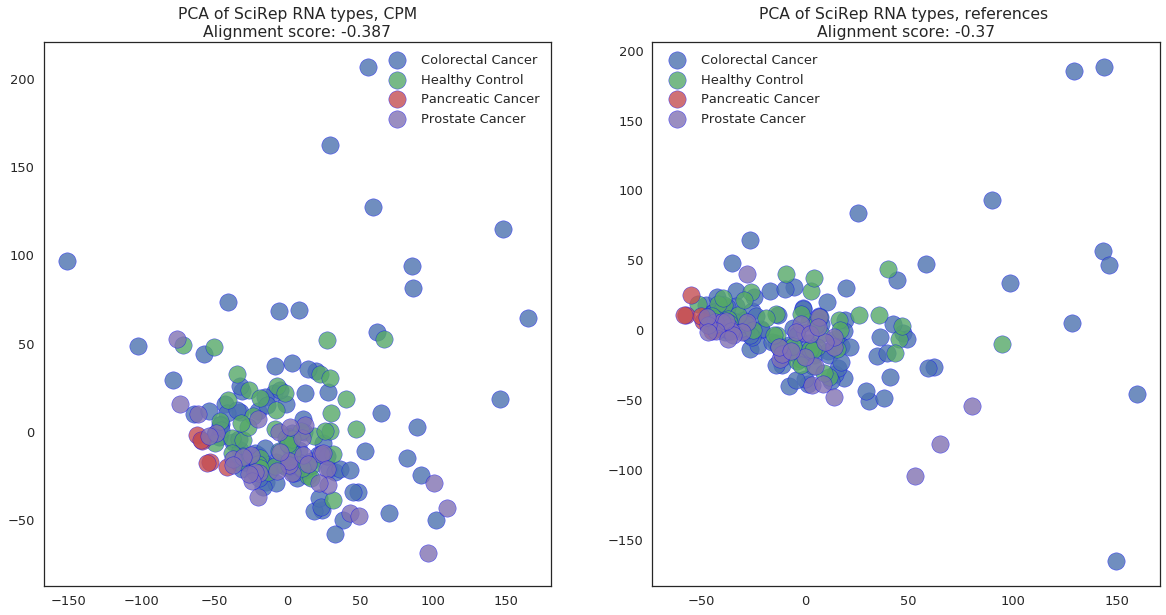

In [1245]:
fig, ax = plt.subplots(1,2,figsize=(20, 10))
table = gsecount
table_reference = gsecount_reference.iloc[:,np.delete(np.arange(gsecount_reference.shape[1]),52)]
#table_reference = gsecount_reference
ratiotable = table[table_reference.columns]*1e6/np.sum(table_reference,axis=0)
X = np.log2(ratiotable + 1).T
#X = cpm_original.T.copy()
X = StandardScaler().fit_transform(X)
#pca = TSNE(2)
pca = PCA()
#pca.fit(X)
X_pca = pca.fit_transform(X)


gselabels = np.unique(samples_GSE[1])

sampleclass = samples_GSE
labels = gselabels 

for label, color in zip(labels, 
                            tableau20[np.array([2,0,5,7,8][:labels.shape[0]])]):
#for label in ['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD']:
    indices = np.nonzero(sampleclass.loc[ratiotable.columns][1] == label)[0]
    ax[0].scatter(X_pca[indices, 0], X_pca[indices, 1], s=300,alpha=0.8 ,edgecolors = 'b',label=label)
ax[0].legend()
ax[0].set_title('PCA of SciRep RNA types, CPM'+'\n'+'Alignment score: {}'.format(np.round(knn_score(X_pca, sampleclass.loc[ratiotable.columns][1].ravel() ),3) ))

print('Alignment score: {}'.format(knn_score(X_pca, sampleclass.loc[ratiotable.columns][1].ravel() )))


table = gsecount.iloc[:,np.delete(np.arange(1,1+gsecount_reference.shape[1]),52)]
#table = gsecount
ratiotable = table.iloc[:,1:]*10e6/np.sum(table.iloc[:,1:],axis=0)
X = np.log2(ratiotable + 1).T
#X = cpm_original.T.copy()
X = StandardScaler().fit_transform(X)
#pca = TSNE(2)
pca = PCA()
#pca.fit(X)
X_pca = pca.fit_transform(X)

gselabels = np.unique(samples_GSE[1])

sampleclass = samples_GSE
labels = gselabels 

for label, color in zip(labels, 
                            tableau20[np.array([2,0,5,7,8][:labels.shape[0]])]):
#for label in ['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD']:
    indices = np.nonzero(sampleclass.loc[ratiotable.columns][1] == label)[0]
    ax[1].scatter(X_pca[indices, 0], X_pca[indices, 1], s=300,alpha=0.8 ,edgecolors = 'b',label=label)
ax[1].legend()
ax[1].set_title('PCA of SciRep RNA types, references '+'\n'+'Alignment score: {}'.format(np.round(knn_score(X_pca, sampleclass.loc[ratiotable.columns][1].ravel() ),3) ))

print('Alignment score: {}'.format(knn_score(X_pca, sampleclass.loc[ratiotable.columns][1].ravel() )))




Alignment score: -0.38676752760522387
Alignment score: -0.3697490380479241
Alignment score: -0.2257874608131678


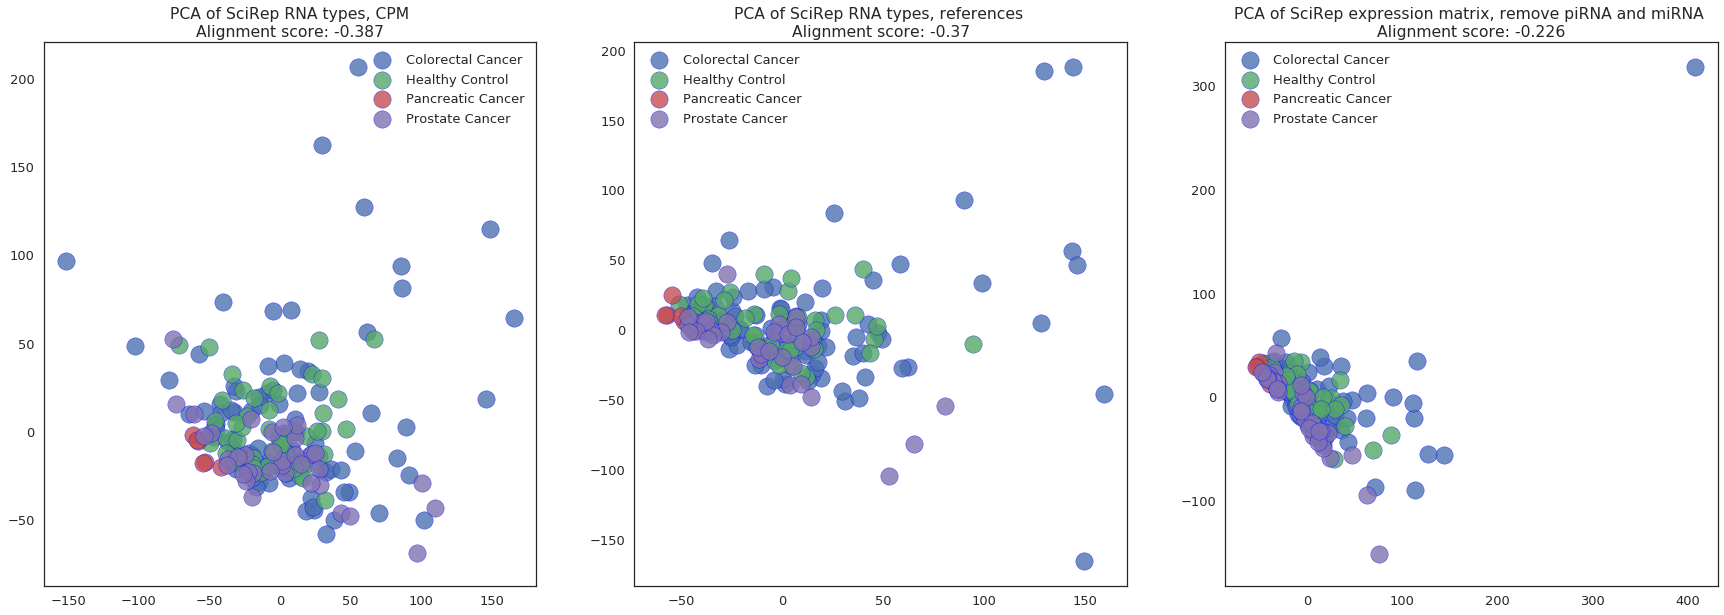

In [1386]:
fig, ax = plt.subplots(1,3,figsize=(30, 10))
table = gsecount
table_reference = gsecount_reference.iloc[:,np.delete(np.arange(gsecount_reference.shape[1]),52)]
#table_reference = gsecount_reference
ratiotable = table[table_reference.columns]*1e6/np.sum(table_reference,axis=0)
X = np.log2(ratiotable + 1).T
#X = cpm_original.T.copy()
X = StandardScaler().fit_transform(X)
#pca = TSNE(2)
pca = PCA()
#pca.fit(X)
X_pca = pca.fit_transform(X)


gselabels = np.unique(samples_GSE[1])

sampleclass = samples_GSE
labels = gselabels 

for label, color in zip(labels, 
                            tableau20[np.array([2,0,5,7,8][:labels.shape[0]])]):
#for label in ['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD']:
    indices = np.nonzero(sampleclass.loc[ratiotable.columns][1] == label)[0]
    ax[0].scatter(X_pca[indices, 0], X_pca[indices, 1], s=300,alpha=0.8 ,edgecolors = 'b',label=label)
ax[0].legend()
ax[0].set_title('PCA of SciRep RNA types, CPM'+'\n'+'Alignment score: {}'.format(np.round(knn_score(X_pca, sampleclass.loc[ratiotable.columns][1].ravel() ),3) ))

print('Alignment score: {}'.format(knn_score(X_pca, sampleclass.loc[ratiotable.columns][1].ravel() )))


table = gsecount.iloc[:,np.delete(np.arange(1,1+gsecount_reference.shape[1]),52)]
#table = gsecount
ratiotable = table.iloc[:,1:]*10e6/np.sum(table.iloc[:,1:],axis=0)
X = np.log2(ratiotable + 1).T
#X = cpm_original.T.copy()
X = StandardScaler().fit_transform(X)
#pca = TSNE(2)
pca = PCA()
#pca.fit(X)
X_pca = pca.fit_transform(X)

gselabels = np.unique(samples_GSE[1])

sampleclass = samples_GSE
labels = gselabels 

for label, color in zip(labels, 
                            tableau20[np.array([2,0,5,7,8][:labels.shape[0]])]):
#for label in ['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD']:
    indices = np.nonzero(sampleclass.loc[ratiotable.columns][1] == label)[0]
    ax[1].scatter(X_pca[indices, 0], X_pca[indices, 1], s=300,alpha=0.8 ,edgecolors = 'b',label=label)
ax[1].legend()
ax[1].set_title('PCA of SciRep RNA types, references '+'\n'+'Alignment score: {}'.format(np.round(knn_score(X_pca, sampleclass.loc[ratiotable.columns][1].ravel() ),3) ))

print('Alignment score: {}'.format(knn_score(X_pca, sampleclass.loc[ratiotable.columns][1].ravel() )))



ratiotable = pd.read_csv('data/expression_matrix/scirep_removed.csv').iloc[:,1:]
X = np.log2(ratiotable + 1).T
#X = cpm_original.T.copy()
X = StandardScaler().fit_transform(X)
#pca = TSNE(2)
pca = PCA()
#pca.fit(X)
X_pca = pca.fit_transform(X)

gselabels = np.unique(samples_GSE[1])

sampleclass = samples_GSE
labels = gselabels 

for label, color in zip(labels, 
                            tableau20[np.array([2,0,5,7,8][:labels.shape[0]])]):
#for label in ['CHD', 'CRC', 'HCC', 'Healthy', 'PAAD']:
    indices = np.nonzero(sampleclass.loc[ratiotable.columns][1] == label)[0]
    ax[2].scatter(X_pca[indices, 0], X_pca[indices, 1], s=300,alpha=0.8 ,edgecolors = 'b',label=label)
ax[2].legend()
ax[2].set_title('PCA of SciRep expression matrix, remove piRNA and miRNA '+'\n'+'Alignment score: {}'.format(np.round(knn_score(X_pca, sampleclass.loc[ratiotable.columns][1].ravel() ),3) ))

print('Alignment score: {}'.format(knn_score(X_pca, sampleclass.loc[ratiotable.columns][1].ravel() )))

In [1246]:
samplesnamesall_hcc

Index(['10515058-A', '12402567-A', '13515292-A', '17402567-B', '249136-B',
       '333874-A', '3497470-B', '385247-A', '385247-B', '423976-B', '482592-A',
       '486978-A', '497411-B', '497497-B', '498127-B', '498187-A', '498187-B',
       '498191-A', '498221-A', '498221-B', '507450-B', '507468-B', '507511-B',
       '507599-B', '507867-B', '507887-B', '507891-B', '507909-B', '508877-B',
       '508897-B', '508955-A', '509155-A', '509442-A', '509970-A', '510199-A',
       '510470-A', '511030-B', '511122-A', '511485-B', '515058-A', '515058-B',
       '515292-A', '515292-B', '5474594-B', '6474170-B', '8397116-B',
       'BD-LOW-mix', 'CXD', 'LY', 'mix1_combined_R1', 'mix2_combined_R1',
       'mix3_combined_R1', 'Normal-1', 'Normal-2', 'Normal-3', 'Normal-4',
       'Normal-5', 'Normal-6', 'Normal-7', 'Normal-8', 'SH325716-B',
       'SH327409-B', 'SH327412-B', 'SH327428-B'],
      dtype='object')

In [1261]:
usesampleid_hcc

array(['249136-B', '385247-B', '423976-B', '497411-B', '497497-B',
       '498127-B', '498187-B', '498221-B', '507450-B', '507468-B',
       '507511-B', '507599-B', '507867-B', '507887-B', '507909-B',
       '508877-B', '508897-B', '511030-B', '511485-B', '515058-B',
       '515292-B', 'SH325716-B', 'SH327409-B', 'SH327412-B', 'SH327428-B',
       '17402567-B', '3497470-B', '5474594-B', '6474170-B', '8397116-B',
       'LY', 'CXD', 'Normal-1', 'Normal-2', 'Normal-3', 'Normal-4',
       'Normal-5', 'Normal-6', 'Normal-7', 'Normal-8', 'mix1_combined_R1',
       'mix2_combined_R1', 'mix3_combined_R1'], dtype='<U16')

In [1248]:
sampleclasshcc =pd.read_table('/Share/home/shibinbin/projects/exRNA/metadata/sample_classes.piranha_peaks.txt', header=None)
sampleclasshcc.index =sampleclasshcc[0]
sampleclasshcc = sampleclasshcc.iloc[:,1:]

In [1250]:
sampleclasshcc.head()

,1
0,
17402567-B,stage_A
249136-B,stage_A
385247-B,stage_A
497411-B,stage_A
498221-B,stage_A


In [1288]:
sampleclasshcc[2] = sampleclasshcc[1]
sampleclasshcc[2][np.where(sampleclasshcc[1] !='Normal' )[0]] = 'HCC'

In [1290]:
sampleclasshcc.head()

,1,2
0,,
17402567-B,stage_A,HCC
249136-B,stage_A,HCC
385247-B,stage_A,HCC
497411-B,stage_A,HCC
498221-B,stage_A,HCC


In [1272]:
table_reference.shape,table.shape

((10, 43), (143666, 43))

In [1398]:
def plot_compare_reference_PCA(table,table_reference,removetable, titlename = 'full', classs ='stage'):
    '''
    table = hcc_full_count.loc[:,usesampleid_hcc]
    table_reference = get_reference_counts(hcc_full_count).loc[:,usesampleid_hcc]
    '''
    
    fig, ax = plt.subplots(1,3,figsize=(30, 10))
    ratiotable = table*1e6/np.sum(table_reference,axis=0)
    if classs =='stage':
        sampleclass = sampleclasshcc[1]
        sampleclass_ = sampleclasshcc.loc[ratiotable.columns][1].ravel()
    elif classs =='hcc':
        sampleclass = sampleclasshcc[2]
        sampleclass_ = sampleclasshcc.loc[ratiotable.columns][2].ravel()
        
    X = np.log2(ratiotable + 1).T
    #X = cpm_original.T.copy()
    X = StandardScaler().fit_transform(X)
    #pca = TSNE(2)
    pca = PCA()
    X_pca = pca.fit_transform(X)
    labels = np.unique(sampleclass)
    for label, color in zip(labels, 
                                tableau20[np.array([2,0,5,7,8][:labels.shape[0]])]):
        indices = np.nonzero(sampleclass_ == label)[0]
        ax[0].scatter(X_pca[indices, 0], X_pca[indices, 1], s=300,alpha=0.8 ,edgecolors = 'b',label=label)
    ax[0].legend()
    ax[0].set_title('PCA of HCClulab '+titlename+ ' RNA types, CPM'+'\n'+'Alignment score: {}'.format(np.round(knn_score(X_pca, sampleclass_ ),3) ))
    print('Alignment score: {}'.format(knn_score(X_pca, sampleclass_ )))
    
    ratiotable = table*10e6/np.sum(table,axis=0)
    X = np.log2(ratiotable + 1).T
    X = StandardScaler().fit_transform(X)
    pca = PCA()
    X_pca = pca.fit_transform(X)
    for label, color in zip(labels, 
                                tableau20[np.array([2,0,5,7,8][:labels.shape[0]])]):
        indices = np.nonzero(sampleclass_ == label)[0]
        ax[1].scatter(X_pca[indices, 0], X_pca[indices, 1], s=300,alpha=0.8 ,edgecolors = 'b',label=label)
    ax[1].legend()
    ax[1].set_title('PCA of HCClulab '+titlename+ ' RNA types, references '+'\n'+'Alignment score: {}'.format(np.round(knn_score(X_pca, sampleclass_ ),3) ))

    print('Alignment score: {}'.format(knn_score(X_pca, sampleclass_ )))
    
    ratiotable = removetable
    X = np.log2(ratiotable + 1).T
    X = StandardScaler().fit_transform(X)
    pca = PCA()
    X_pca = pca.fit_transform(X)
    for label, color in zip(labels, 
                                tableau20[np.array([2,0,5,7,8][:labels.shape[0]])]):
        indices = np.nonzero(sampleclass_ == label)[0]
        ax[2].scatter(X_pca[indices, 0], X_pca[indices, 1], s=300,alpha=0.8 ,edgecolors = 'b',label=label)
    ax[2].legend()
    ax[2].set_title('PCA of HCClulab '+titlename+ ' expression matrix, remove piRNA and miRNA '+'\n'+'Alignment score: {}'.format(np.round(knn_score(X_pca, sampleclass_ ),3) ))

    print('Alignment score: {}'.format(knn_score(X_pca, sampleclass_ )))
    


Alignment score: 0.01549950650792674
Alignment score: -0.03439832521127627
Alignment score: -0.004150345444451282


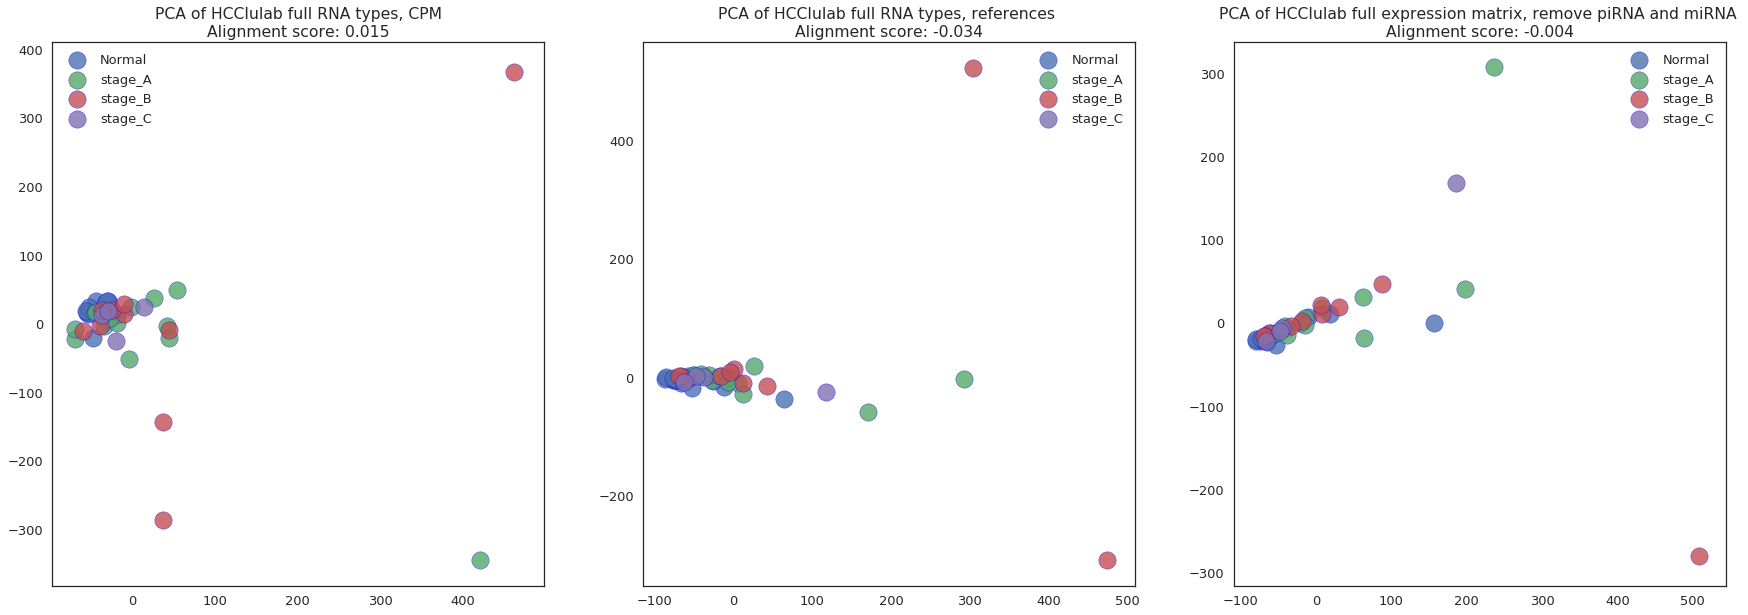

In [1399]:
plot_compare_reference_PCA(hcc_full_count.loc[:,usesampleid_hcc],
                           get_reference_counts(hcc_full_count).loc[:,usesampleid_hcc],
                           pd.read_csv('data/expression_matrix/hccfull_removed.csv').iloc[:,1:].loc[:,usesampleid_hcc],
                           titlename = 'full', classs ='stage')

Alignment score: -0.6380112269446668
Alignment score: -1.066319165998396
Alignment score: -0.5714915797914991


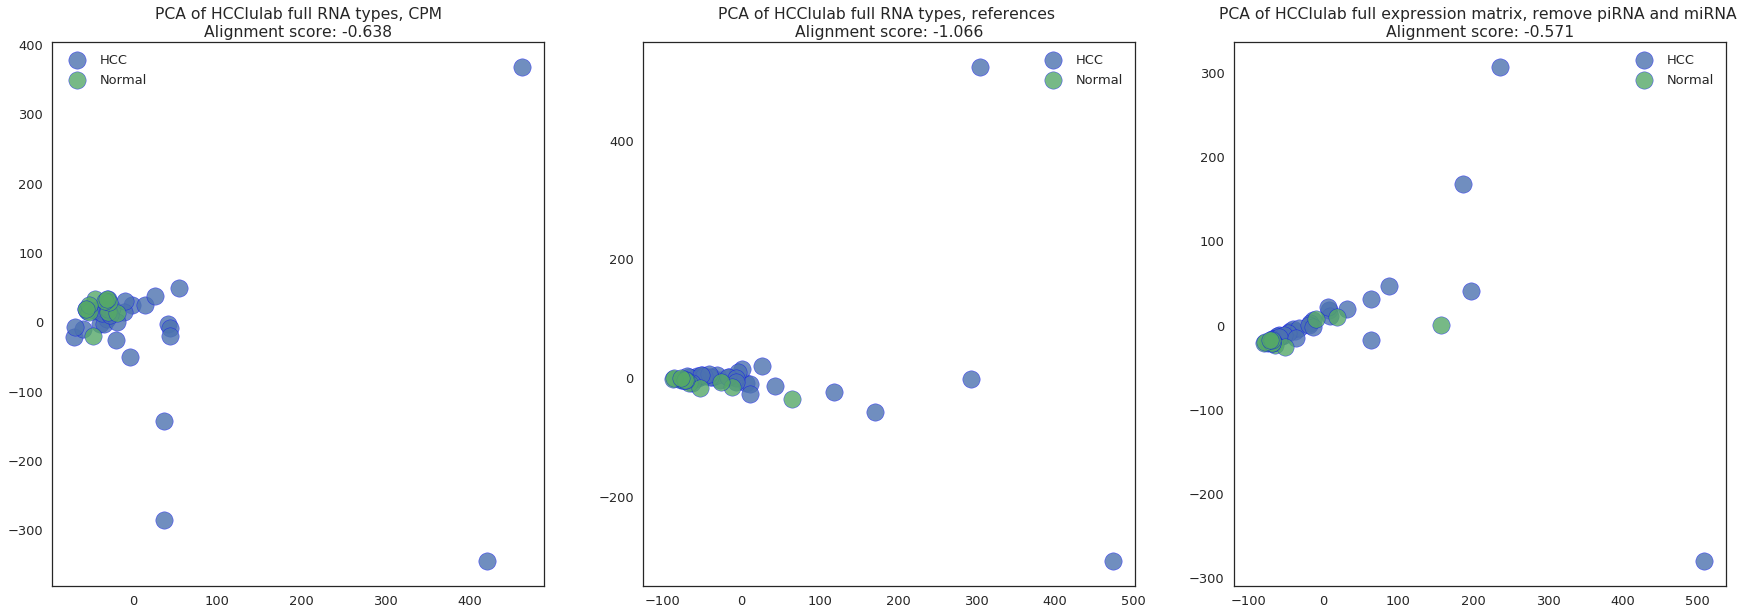

In [1400]:
plot_compare_reference_PCA(hcc_full_count.loc[:,usesampleid_hcc],
                           get_reference_counts(hcc_full_count).loc[:,usesampleid_hcc],
                           pd.read_csv('data/expression_matrix/hccfull_removed.csv').iloc[:,1:].loc[:,usesampleid_hcc],
                           titlename = 'full', classs ='hcc')

Alignment score: 0.10696402134353218
Alignment score: 0.2221022762321881
Alignment score: 0.21861679569428172


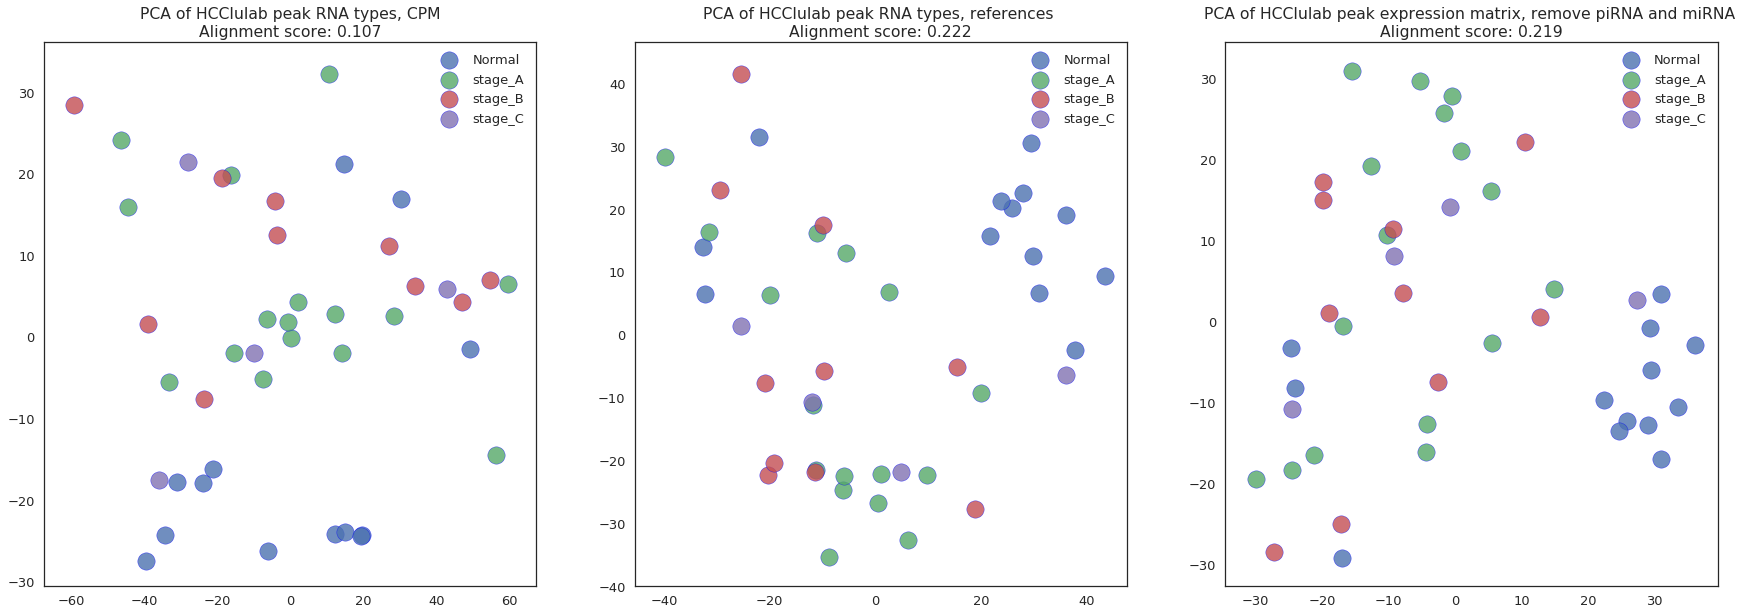

In [1410]:
plot_compare_reference_PCA(hcc_peak_count.loc[:,usesampleid_hcc],
                           hcc_peak_count.loc[referencegene_peak].loc[:,usesampleid_hcc],
                           pd.read_csv('data/expression_matrix/hccpeak_removed.csv').iloc[:,1:].loc[:,usesampleid_hcc],
                           titlename = 'peak', classs ='stage')

Alignment score: 0.4190056134723336
Alignment score: 0.5220128307939054
Alignment score: 0.526784282277466


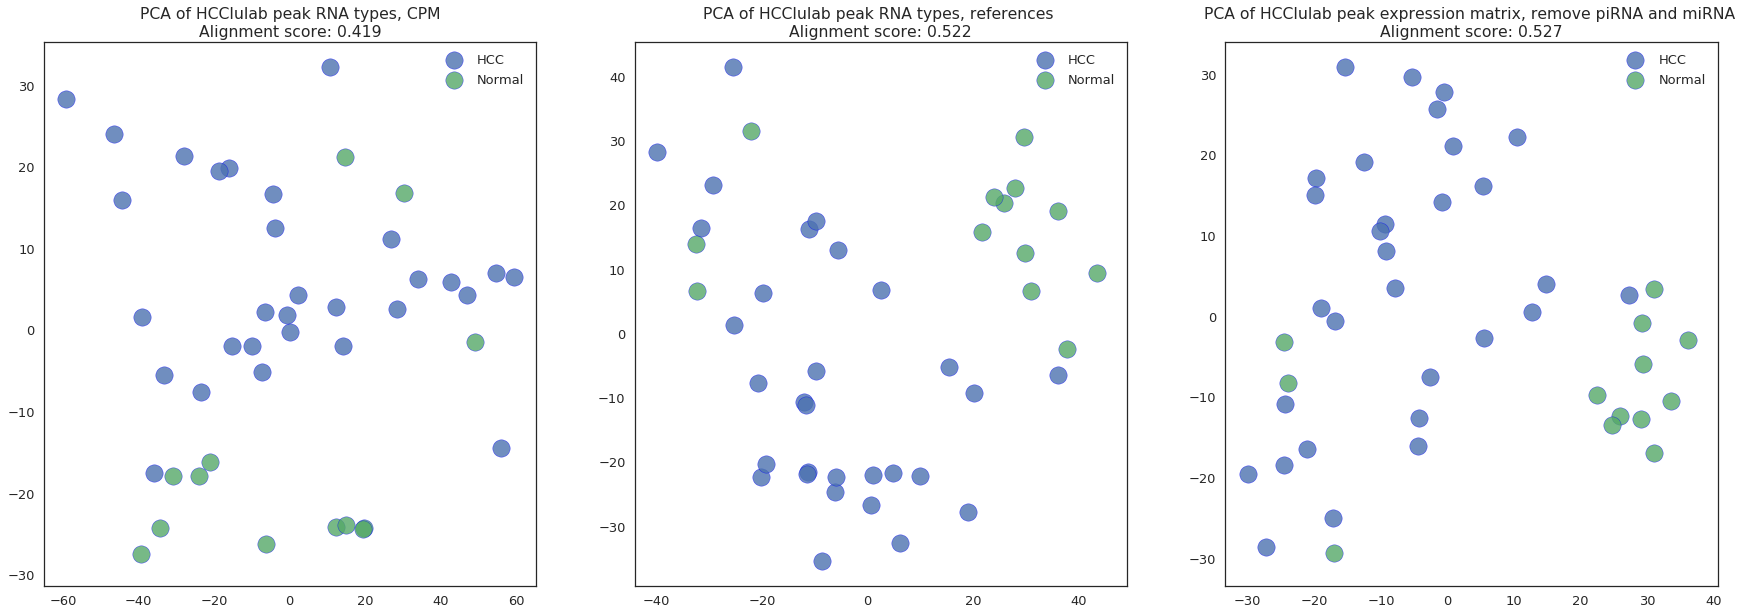

In [1409]:
plot_compare_reference_PCA(hcc_peak_count.loc[:,usesampleid_hcc],
                           hcc_peak_count.loc[referencegene_peak].loc[:,usesampleid_hcc],
                           pd.read_csv('data/expression_matrix/hccpeak_removed.csv').iloc[:,1:].loc[:,usesampleid_hcc],
                           titlename = 'peak', classs ='hcc')

Alignment score: 0.13107496453025724
Alignment score: 0.2346637699710074
Alignment score: 0.22676172814755421


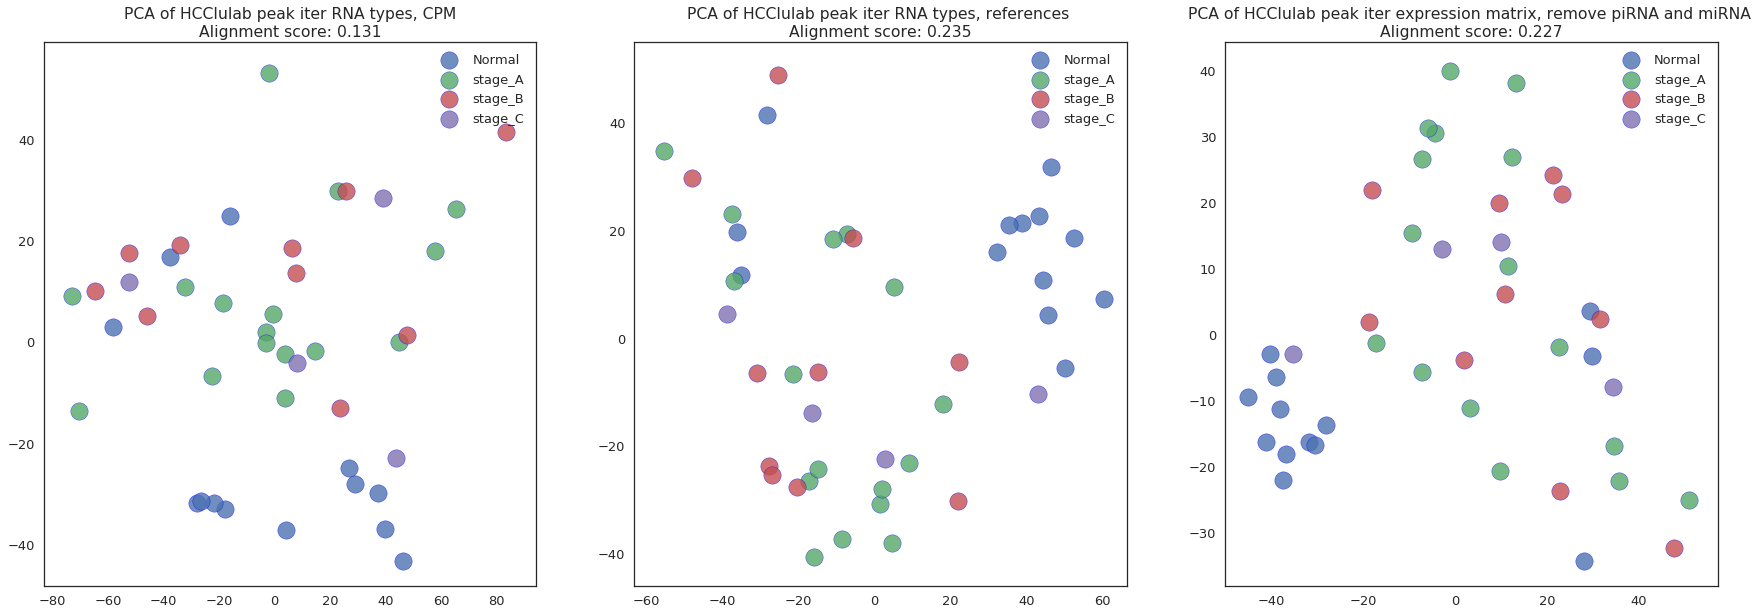

In [1408]:
plot_compare_reference_PCA(hcc_peak_iter_count.loc[:,usesampleid_hcc],
                           hcc_peak_iter_count.loc[referencegene_peak].loc[:,usesampleid_hcc],
                           pd.read_csv('data/expression_matrix/hccpeakiter_removed.csv').iloc[:,1:].loc[:,usesampleid_hcc],
                           titlename = 'peak iter', classs ='stage')

Alignment score: 0.47457898957497996
Alignment score: 0.578989574979952
Alignment score: 0.5172413793103448


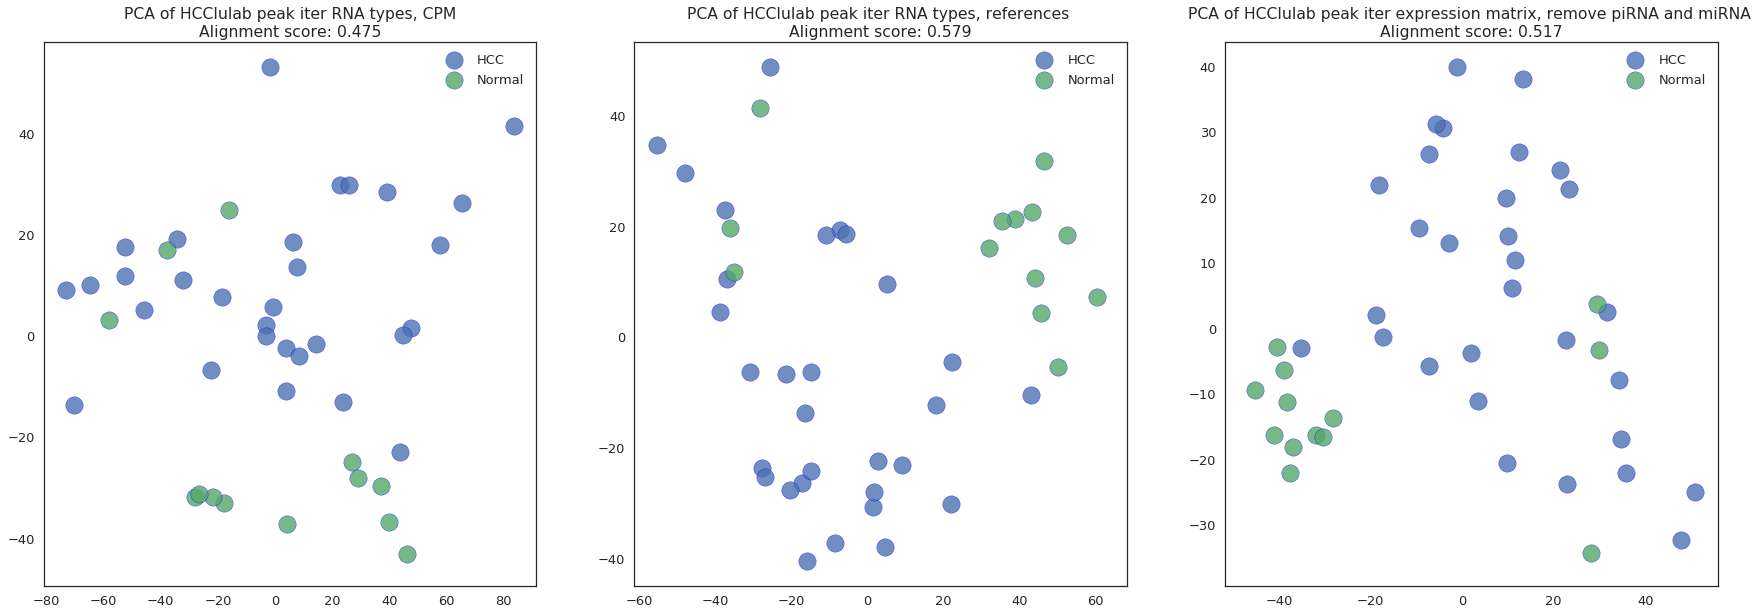

In [1407]:
plot_compare_reference_PCA(hcc_peak_iter_count.loc[:,usesampleid_hcc],
                           hcc_peak_iter_count.loc[referencegene_peak].loc[:,usesampleid_hcc],
                           pd.read_csv('data/expression_matrix/hccpeakiter_removed.csv').iloc[:,1:].loc[:,usesampleid_hcc],
                           titlename = 'peak iter', classs ='hcc')

In [ ]:
fig,ax=plt.subplots(figsize=(20,8))
sns.boxplot(data = stdscale.fit_transform(gsecount_reference.T)[:,np.delete(np.arange(0,10),np.array([3]))],ax=ax)
fig,ax=plt.subplots(figsize=(20,8))
sns.boxplot(data = stdscale.fit_transform(gsecount_reference.T)[:,np.delete(np.arange(0,10),np.array([3,4]))],ax=ax)
fig,ax=plt.subplots(figsize=(20,8))
sns.boxplot(data = stdscale.fit_transform(gsecount_reference.T)[:,np.delete(np.arange(0,10),np.array([1,3,4,7]))],ax=ax)

## 去mi pi
搞清楚几种数据如何对应到annotation
用gene_type索引来去掉

In [1]:
geneannotation

NameError: name 'geneannotation' is not defined